**WHO ARE THE MOST PROFITABLE/LEAST PROFITABLE CLIENTS**

# First, have to finish some of my objectives with the data

# categorizing and describing sales that occured

In [ ]:
import pandas as pd
df = pd.read_excel(r'/content/TRUELY_TIDIED.xlsx')

pd.set_option('display.max_columns', 31)

FileNotFoundError: [Errno 2] No such file or directory: '/content/TRUELY_TIDIED.xlsx'

In [ ]:
import pandas as pd
df = pd.read_excel('/content/mediaTRUELY_TIDIED2.xlsx')

In [ ]:
pd.set_option('display.max_columns',32)

In [ ]:
df_sd = pd.read_csv(r'/content/Superstore.csv', encoding= 'latin1')

df_sd.loc[(df_sd['Customer Name'] == 'Becky Martin') & (df_sd['Discount'] == 0.8)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
169,170,CA-2011-139892,08-09-2011,12-09-2011,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207,Central,OFF-AP-10002518,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece Power Center,177.98,5,0.8,-453.849


In [ ]:
df.rename(columns = {'net_sales':'gross_profit_less_discounts'}, inplace = True)

In [ ]:
df.rename(columns = {'gross_rev':'net_sales'}, inplace = True)

In [ ]:
df.loc[df['discount_percent']>=0.8].head(3)

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,net_sales,cogs,gross_profit,discount_percent,discount_total,gross_profit_less_discounts,approx_defected_items,sales_issue,result_of_issue
31,CA-2011-139892,2011-08-09,Tuesday,2011-12-09,Standard Class,6,122,BM-11140,Becky Martin,Consumer,San Antonio,Texas,78207,Central,OFF-AP-10002518,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece Power Center,126.36580,64.07280,5,0.00000,320.3640,631.8290,-311.4650,0.8,142.3840,-453.8490,0,major delayed shipment & COGS,net loss
36,US-2011-100853,2011-09-14,Wednesday,2011-09-19,Standard Class,6,5,JB-15400,Jennifer Braxton,Corporate,Chicago,Illinois,60623,Central,OFF-AP-10000891,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece HOMEOFFICE Pow...,91.78400,47.20320,2,0.00000,94.4064,183.5680,-89.1616,0.8,41.9584,-131.1200,2,random discount & COGS,net loss
88,US-2011-134971,2011-07-06,Wednesday,2011-10-06,Second Class,4,92,BP-11095,Bart Pistole,Corporate,Peoria,Illinois,61604,Central,OFF-BI-10003982,Office Supplies,Binders,Wilson Jones Century Plastic Molded Ring Binders,10.63424,7.10334,3,1.12158,22.4316,33.0243,-10.5927,0.8,9.9696,-20.5623,0,major delayed shipment & COGS,net loss


In [ ]:
df.columns

Index(['order_id', 'order_date', 'day_ordered', 'ship_date', 'ship_mode',
       'stand_delivery_delay', 'days_to_ship', 'cust_id', 'cust_name',
       'cust_type', 'city', 'state', 'zip', 'region', 'prod_id', 'prod_type',
       'prod_sub-type', 'prod_name', 'prod_cost', 'prod_price',
       'quantity_ordered', 'ship_cost', 'net_sales', 'cogs', 'gross_profit',
       'discount_percent', 'discount_total', 'gross_profit_less_discounts',
       'approx_defected_items', 'sales_issue', 'result_of_issue'],
      dtype='object')

In [ ]:
df['sales_issue'].value_counts()

sales_issue
major delayed shipment                                  2647
none                                                    2488
random discount                                         1883
date_of_shipment entry error                            1461
defects                                                  409
defects & COGS                                           399
random discount & COGS                                   234
date_of_shipment entry error & likely defects            163
major delayed shipment & COGS                            158
date_of_shipment entry error & likely defects & COGS      76
date_of_shipment entry error & COGS                       53
COGS                                                      15
delayed same day delivery                                  8
Name: count, dtype: int64

In [ ]:
df['result_of_issue'].value_counts() #no cogs #yes deliver delay

result_of_issue
net sales decrease               2715
none                             2488
net loss                         1871
uncertainty & no profit          1464
lack of discount administered    1406
no profit                          50
Name: count, dtype: int64

In [ ]:
filt = (df['sales_issue'] == 'none') & (df['discount_total']>0) & ((df['days_to_ship'] - df['stand_delivery_delay']) >= 10)
df.loc[filt,'sales_issue'] = 'major delayed shipment'
df.loc[filt,'result_of_issue'] = 'net sales decrease'

In [ ]:
filt = (df['sales_issue'] == 'none') & (df['discount_total']>0) & (df['stand_delivery_delay'] < 0) & ((df['discount_total']//df['prod_price'])>=1)

df.loc[filt] #none

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,net_sales,cogs,gross_profit,discount_percent,discount_total,gross_profit_less_discounts,approx_defected_items,sales_issue,result_of_issue


Can see that the rest of these should be categorized as random discounts

In [ ]:
filt = (df['sales_issue'] == 'none') & (df['discount_total']>0)

df.loc[filt, 'sales_issue'] = 'random discount'

df.loc[filt, 'result_of_issue'] = 'net sales decrease'

In [ ]:
filename = 'TRUELY_TIDIED2.xlsx'
df.to_excel(r"/media"+filename, index = False)

In [ ]:
df_sd.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.iloc[6:11]

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,net_sales,cogs,gross_profit,discount_percent,discount_total,gross_profit_less_discounts,approx_defected_items,sales_issue,result_of_issue,discount_given
6,CA-2011-115812,2011-09-06,Tuesday,2011-06-14,Standard Class,6,-84,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,210.7668,273.4272,4,0.0000,1093.7088,843.0672,250.6416,0.2,182.2848,68.3568,0,date_of_shipment entry error,uncertainty & no profit,True
7,CA-2011-105893,2011-11-11,Friday,2011-11-18,Standard Class,6,7,PK-19075,Pete Kriz,Consumer,Madison,Wisconsin,53711,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",108.7604,110.9800,6,0.0000,665.8800,652.5624,13.3176,0.0,0.0000,13.3176,0,none,none,False
8,CA-2011-167164,2011-05-13,Friday,2011-05-15,Second Class,4,2,AG-10270,Alejandro Grove,Consumer,West Jordan,Utah,84084,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,21.3675,26.3625,2,2.7750,55.5000,45.5100,9.9900,0.0,0.0000,9.9900,0,none,none,False
9,CA-2011-143336,2011-08-27,Saturday,2011-01-09,Second Class,4,-230,ZD-21925,Zuschuss Donatelli,Consumer,San Francisco,California,94109,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,2.8248,4.0660,2,0.4280,8.5600,6.0776,2.4824,0.0,0.0000,2.4824,0,date_of_shipment entry error,uncertainty & no profit,False
10,CA-2011-143336,2011-08-27,Saturday,2011-01-09,Second Class,4,-230,ZD-21925,Zuschuss Donatelli,Consumer,San Francisco,California,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,61.5534,81.1224,3,12.8088,256.1760,197.4690,58.7070,0.2,42.6960,16.0110,0,date_of_shipment entry error,uncertainty & no profit,True


In [ ]:
import matplotlib.pyplot as plt

# Beginning Analysis of Customers

In [ ]:
all_cust = pd.DataFrame(df.groupby('cust_name')['gross_profit_less_discounts'].sum())

In [ ]:
c_type = pd.DataFrame(df.groupby('cust_name')['prod_sub-type'].apply(lambda x: x.mode().iloc[0]))

In [ ]:
all_cust_behavior = pd.merge(all_cust, c_type, how = 'left', left_index = True, right_index = True)

In [ ]:
df_least_profitable = all_cust_behavior.sort_values(by = 'gross_profit_less_discounts').head(10)

In [ ]:
# find how many times each of these customers placed individual orders

filt = (df['cust_name'].isin(df_least_profitable.index))

df_cust_type_least = df.loc[filt, ['cust_name','order_id']]

df_orders = pd.DataFrame(df_cust_type_least.groupby('cust_name')['order_id'].unique())

df_orders['total_orders'] = df_orders['order_id'].apply(len)

least_prof_tot_orders =df_orders.sort_values(by = 'total_orders', ascending = False)

least_prof_tot_orders.drop(columns = 'order_id', inplace = True)

In [ ]:
df_least = pd.merge(df_least_profitable, least_prof_tot_orders, how = 'left', left_index = True, right_index = True)

In [ ]:
# find customers most recent order
filt = (df['cust_name'].isin(df_least_profitable.index))

df_cust_type_least = df.loc[filt, ['cust_name','order_date']]

df_cust_type_least = pd.DataFrame(df_cust_type_least.groupby('cust_name')['order_date'].max())

df_cust_type_least.rename(columns = {'order_date': 'most_recent'}, inplace = True)

max_order = df['order_date'].max()

df_cust_type_least['days_since_recent'] = max_order - df_cust_type_least['most_recent']

df_least_recent_order = df_cust_type_least

#added to this to show how many days have passed since the least profitable customers made an order


In [ ]:
df_least = pd.merge(df_least,df_least_recent_order, how = 'left', left_index = True, right_index = True)

In [ ]:
# find customers first order
filt = (df['cust_name'].isin(df_least_profitable.index))

df_cust_type_least = df.loc[filt, ['cust_name','order_date']]

df_least_first_order = pd.DataFrame(df_cust_type_least.groupby('cust_name')['order_date'].min())

df_least_first_order.rename(columns = {'order_date': 'first_order'},inplace = True)

df_least_first_order['days_since_first'] = max_order - df_least_first_order['first_order']


In [ ]:
df_least = pd.merge(df_least, df_least_first_order, how = 'left', left_index= True, right_index = True)

df_least


,gross_profit_less_discounts,prod_sub-type,total_orders,most_recent,days_since_recent,first_order,days_since_first
cust_name,,,,,,,
Cindy Stewart,-6626.3895,Machines,6,2014-03-11,295 days,2011-03-26,1376 days
Grant Thornton,-4108.6589,Binders,3,2014-05-11,234 days,2011-06-06,1304 days
Luke Foster,-3583.9770,Binders,7,2014-09-12,110 days,2011-06-12,1298 days
Sharelle Roach,-3333.9144,Binders,5,2014-12-23,8 days,2011-06-14,1296 days
Henry Goldwyn,-2797.9635,Binders,12,2014-08-12,141 days,2011-09-20,1198 days
Nathan Cano,-2204.8072,Binders,6,2014-11-20,41 days,2011-03-05,1397 days
Sean Braxton,-2082.7451,Machines,7,2014-11-14,47 days,2011-07-09,1271 days
Sean Miller,-1980.7393,Paper,5,2014-10-13,79 days,2011-03-18,1384 days
Christine Phan,-1850.3029,Binders,8,2014-07-24,160 days,2011-03-17,1385 days


In [ ]:
df_least.rename(columns = {'gross_profit_less_discounts':'Cumulative Profit Generated','prod_sub-type':'Most Purchase Product Type','total_orders':'Total Orders Placed','most_recent':'Most Recent Order','days_since_recent':'Days Since Recent Order','first_order':'Date Since First Order','days_since_first':'Days Since First Order Placed'}, inplace = True)

In [ ]:
df_least

,Cumulative Profit Generated,Most Purchase Product Type,Total Orders Placed,Most Recent Order,Days Since Recent Order,Date Since First Order,Days Since First Order Placed
cust_name,,,,,,,
Cindy Stewart,-6626.3895,Machines,6,2014-03-11,295 days,2011-03-26,1376 days
Grant Thornton,-4108.6589,Binders,3,2014-05-11,234 days,2011-06-06,1304 days
Luke Foster,-3583.9770,Binders,7,2014-09-12,110 days,2011-06-12,1298 days
Sharelle Roach,-3333.9144,Binders,5,2014-12-23,8 days,2011-06-14,1296 days
Henry Goldwyn,-2797.9635,Binders,12,2014-08-12,141 days,2011-09-20,1198 days
Nathan Cano,-2204.8072,Binders,6,2014-11-20,41 days,2011-03-05,1397 days
Sean Braxton,-2082.7451,Machines,7,2014-11-14,47 days,2011-07-09,1271 days
Sean Miller,-1980.7393,Paper,5,2014-10-13,79 days,2011-03-18,1384 days
Christine Phan,-1850.3029,Binders,8,2014-07-24,160 days,2011-03-17,1385 days


In [ ]:
# the different "client types" from the data. aka why i don't think deriving client base is really impactful
#or provides much insight in the grand scope of things ultimately

df['cust_type'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
# least profitable clients and what client base they are most derived from (pool of 100)

df_larger_least_base = pd.DataFrame(df.groupby('cust_name')['gross_profit_less_discounts'].sum().sort_values(ascending = True).head(100))

filt = (df['cust_name'].isin(df_larger_least_base.index))

df_cust_type_least = df.loc[filt, ['cust_name','cust_type']]#.set_index('cust_name')

df_cust_type_least.groupby('cust_name')['cust_type'].unique().value_counts(normalize = True) #out of 100 people, shows the
#ratio percent of orders from each group (unsure which format i want yet, but just in case)

cust_type
[Consumer]       0.52
[Corporate]      0.33
[Home Office]    0.15
Name: proportion, dtype: float64

*Now For most profitable*

In [ ]:
df_most_profitable = all_cust_behavior.sort_values(by = 'gross_profit_less_discounts', ascending = False).head(10)

In [ ]:
filt = (df['cust_name'] == 'Tamara Chand')

df.loc[filt] #Tamara has not ordered since the major delayed shipment and no discount applied to the order
#honestly shocking she ever really ordered considering how many issues were applied to her order but at least on the
#first order attention was given to her

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,net_sales,cogs,gross_profit,discount_percent,discount_total,gross_profit_less_discounts,approx_defected_items,sales_issue,result_of_issue
612,CA-2011-123498,2011-07-11,Monday,2011-09-11,First Class,3,62,TC-20980,Tamara Chand,Corporate,Houston,Texas,77041,Central,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,21.87864,14.06484,3,4.68828,46.8828,70.3242,-23.4414,0.8,20.8368,-44.2782,0,major delayed shipment,net loss
613,CA-2011-123498,2011-07-11,Monday,2011-09-11,First Class,3,62,TC-20980,Tamara Chand,Corporate,Houston,Texas,77041,Central,OFF-EN-10004773,Office Supplies,Envelopes,Staples,12.82572,26.76672,3,8.92224,89.2224,47.3994,41.8230,0.2,14.8704,26.9526,0,major delayed shipment,net sales decrease
1651,CA-2011-153087,2011-12-27,Tuesday,2012-03-01,Standard Class,6,65,TC-20980,Tamara Chand,Corporate,Decatur,Alabama,35601,South,OFF-PA-10001243,Office Supplies,Paper,Xerox 1983,3.04980,5.98000,4,0.00000,23.9200,12.1992,11.7208,0.0,0.0000,11.7208,0,major delayed shipment,lack of discount administered
1652,CA-2011-153087,2011-12-27,Tuesday,2012-03-01,Standard Class,6,65,TC-20980,Tamara Chand,Corporate,Decatur,Alabama,35601,South,TEC-AC-10003198,Technology,Accessories,Enermax Acrylux Wireless Keyboard,62.74800,99.60000,5,0.00000,498.0000,313.7400,184.2600,0.0,0.0000,184.2600,0,major delayed shipment,lack of discount administered
3682,CA-2012-156013,2012-09-20,Thursday,2012-09-26,Standard Class,6,6,TC-20980,Tamara Chand,Corporate,Long Beach,New York,11561,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,6.50840,12.28000,5,0.00000,61.4000,32.5420,28.8580,0.0,0.0000,28.8580,0,none,none
3683,CA-2012-156013,2012-09-20,Thursday,2012-09-26,Standard Class,6,6,TC-20980,Tamara Chand,Corporate,Long Beach,New York,11561,East,OFF-BI-10002437,Office Supplies,Binders,Recycled Premium Regency Composition Covers,7.79280,14.66880,2,0.00000,29.3376,15.5856,13.7520,0.2,4.8896,8.8624,0,random discount,net sales decrease
4690,CA-2013-129693,2013-11-27,Wednesday,2013-03-12,Standard Class,6,-260,TC-20980,Tamara Chand,Corporate,Seattle,Washington,98105,West,OFF-BI-10002954,Office Supplies,Binders,Newell 3-Hole Punched Plastic Slotted Magazine...,2.37640,4.38720,2,0.00000,8.7744,4.7528,4.0216,0.2,1.4624,2.5592,0,date_of_shipment entry error,uncertainty & no profit
5826,CA-2013-118689,2013-03-10,Sunday,2013-10-10,Standard Class,6,214,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,47905,Central,OFF-ST-10001558,Office Supplies,Storage,Acco Perma 4000 Stacking Storage Drawers,13.80400,16.24000,2,0.00000,32.4800,27.6080,4.8720,0.0,0.0000,4.8720,0,major delayed shipment,lack of discount administered
5827,CA-2013-118689,2013-03-10,Sunday,2013-10-10,Standard Class,6,214,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,1819.99480,3499.99000,5,0.00000,17499.9500,9099.9740,8399.9760,0.0,0.0000,8399.9760,0,major delayed shipment,lack of discount administered
5828,CA-2013-118689,2013-03-10,Sunday,2013-10-10,Standard Class,6,214,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,47905,Central,OFF-BI-10004600,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,202.39450,367.99000,2,0.00000,735.9800,404.7890,331.1910,0.0,0.0000,331.1910,0,major delayed shipment,lack of discount administered


In [ ]:
# find how many times each of these customers placed individual orders

filt = (df['cust_name'].isin(df_most_profitable.index))

df_cust_type_most = df.loc[filt, ['cust_name','order_id']]#.set_index('cust_name')

df_orders = pd.DataFrame(df_cust_type_most.groupby('cust_name')['order_id'].unique())

df_orders['total_orders'] = df_orders['order_id'].apply(len)

most_prof_tot_orders = df_orders.sort_values(by = 'total_orders', ascending = False)

most_prof_tot_orders.drop(columns = 'order_id', inplace = True)

In [ ]:
# find customers most recent order
filt = (df['cust_name'].isin(df_most_profitable.index))

df_cust_type_most = df.loc[filt, ['cust_name','order_date']]#.set_index('cust_name')

df_most_recent = pd.DataFrame(df_cust_type_most.groupby('cust_name')['order_date'].max())    #pretty major here. it has been over a year since
#most profitable customers last order

df_most_recent.rename(columns = {'order_date': 'most_recent'}, inplace = True)

df_most_recent['days_ago'] = max_order - df_most_recent['most_recent']

df_most_recent = df_most_recent.sort_values(by = 'days_ago', ascending = False)

df_most_recent
#good insight here top 3 most profitable customers haven't ordered in QUITE some time

,most_recent,days_ago
cust_name,,
Tamara Chand,2013-11-27,399 days
Sanjit Chand,2014-01-16,349 days
Raymond Buch,2014-09-26,96 days
Keith Dawkins,2014-10-09,83 days
Tom Ashbrook,2014-10-23,69 days
Hunter Lopez,2014-11-18,43 days
Adrian Barton,2014-11-20,41 days
Christopher Martinez,2014-11-24,37 days
Daniel Raglin,2014-12-08,23 days


In [ ]:
df_most_recent['days_ago'].mean() #consider adjusting the size of these pools so can truly see which customers have stuck around
#have the least customers on average ordered more recently or have the profitable customers ordered more recently on average

Timedelta('114 days 14:24:00')

In [ ]:
# find customers first order
filt = (df['cust_name'].isin(df_most_profitable.index))

df_cust_type_most = df.loc[filt, ['cust_name','order_date']]#.set_index('cust_name')

df_most_first = pd.DataFrame(df_cust_type_most.groupby('cust_name')['order_date'].min()) #most profitable customer was one of the first people to order since
#transactions have been recorded!

df_most_first.rename(columns = {'order_date': 'first_order'}, inplace = True)

df_most_first['days_ago'] = max_order - df_most_first['first_order']

df_most_first = df_most_first.sort_values(by = 'days_ago', ascending = False)

df_most_first #customers at top have been "part of the team" and buying from SS for longer

,first_order,days_ago
cust_name,,
Hunter Lopez,2011-01-21,1440 days
Sanjit Chand,2011-02-09,1421 days
Daniel Raglin,2011-03-28,1374 days
Tamara Chand,2011-07-11,1269 days
Keith Dawkins,2011-09-28,1190 days
Andy Reiter,2011-11-25,1132 days
Tom Ashbrook,2011-12-09,1118 days
Adrian Barton,2011-12-20,1107 days
Christopher Martinez,2012-03-16,1020 days


In [ ]:
#what client base the most profitable clients are mostly derived from
#going to change the scope of this to see if it makes for more insight


df_larger_most_base = df_most_profitable = pd.DataFrame(df.groupby('cust_name')['gross_profit_less_discounts'].sum().sort_values(ascending = False).head(100))

filt = (df['cust_name'].isin(df_larger_most_base.index))

df_cust_type_most = df.loc[filt, ['cust_name','cust_type']]#.set_index('cust_name')

df_cust_type_most.groupby('cust_name')['cust_type'].unique().value_counts(normalize = True)

#as hypothesized, this does NOT hint much at how supersuppliers should market based off of their client base.

cust_type
[Consumer]       0.40
[Corporate]      0.35
[Home Office]    0.25
Name: proportion, dtype: float64

***Net Idea for Categorizing Customers and Observing***

In [ ]:
df_by_date = df.sort_values(by = 'order_date')

In [ ]:
df_by_date.columns

Index(['order_id', 'order_date', 'day_ordered', 'ship_date', 'ship_mode',
       'stand_delivery_delay', 'days_to_ship', 'cust_id', 'cust_name',
       'cust_type', 'city', 'state', 'zip', 'region', 'prod_id', 'prod_type',
       'prod_sub-type', 'prod_name', 'prod_cost', 'prod_price',
       'quantity_ordered', 'ship_cost', 'net_sales', 'cogs', 'gross_profit',
       'discount_percent', 'discount_total', 'gross_profit_less_discounts',
       'approx_defected_items', 'sales_issue', 'result_of_issue'],
      dtype='object')

In [ ]:
net_sales_cust = all_cust.sort_values(by = 'gross_profit_less_discounts', ascending = False)

net_sales_cust['sales_rank'] = range(1,net_sales_cust.shape[0]+1)

net_sales_cust

,gross_profit_less_discounts,sales_rank
cust_name,,
Tamara Chand,8981.3239,1
Raymond Buch,6976.0959,2
Sanjit Chand,5757.4119,3
Hunter Lopez,5622.4292,4
Adrian Barton,5444.8055,5
...,...,...
Henry Goldwyn,-2797.9635,789
Sharelle Roach,-3333.9144,790
Luke Foster,-3583.9770,791


In [ ]:
total_quantities = pd.DataFrame(df_by_date.groupby('cust_name')['quantity_ordered'].sum())

In [ ]:
last_order_detail = pd.DataFrame(df_by_date.groupby('cust_name')['sales_issue'].last())

In [ ]:
last_order_remedy = pd.DataFrame(df_by_date.groupby('cust_name')['result_of_issue'].last())

In [ ]:
last_order_date = pd.DataFrame(df_by_date.groupby('cust_name')['order_date'].last())

In [ ]:
total_orders_placed = pd.DataFrame(df.groupby('cust_name')['order_id'].unique().apply(len))

In [ ]:
all_cust = pd.merge(net_sales_cust, total_quantities, how = 'left', left_index = True, right_index = True)

all_cust = pd.merge(all_cust, last_order_detail, how = 'left', left_index = True, right_index = True )

all_cust = pd.merge(all_cust, last_order_remedy, how = 'left', left_index = True, right_index = True )

all_cust = pd.merge(all_cust, last_order_date, how = 'left', left_index = True, right_index = True )

In [ ]:
all_cust['days_since_last_order'] = (df_by_date['order_date'].max() - all_cust['order_date'])

In [ ]:
all_cust.rename(columns = {'gross_profit_less_discounts':'Total Profit Generated','sales_rank': 'Customer Sales Rank', 'quantity_ordered':'Total Products Purchased','sales_issue':'Last Order Issue','result_of_issue':'Consequence of Issue','order_date':'Date of Last Order','days_since_last_order':'Days Since Order'}, inplace = True)

In [ ]:
all_cust = pd.merge(all_cust, total_orders_placed, how = 'left', left_index = True, right_index = True)

In [ ]:
all_cust.rename(columns = {'order_id':'Total Orders Placed'},inplace = True)

In [ ]:
all_cust.head(10)

,Total Profit Generated,Customer Sales Rank,Total Products Purchased,Total Orders Placed,Last Order Issue,Consequence of Issue,Date of Last Order,Days Since Order
cust_name,,,,,,,,
Tamara Chand,8981.3239,1,42,5,date_of_shipment entry error,uncertainty & no profit,2013-11-27,399 days
Raymond Buch,6976.0959,2,71,6,defects,net sales decrease,2014-09-26,96 days
Sanjit Chand,5757.4119,3,87,9,none,none,2014-01-16,349 days
Hunter Lopez,5622.4292,4,50,6,none,none,2014-11-18,43 days
Adrian Barton,5444.8055,5,73,10,none,none,2014-11-20,41 days
Tom Ashbrook,4703.7883,6,36,4,none,none,2014-10-23,69 days
Christopher Martinez,3899.8904,7,34,4,random discount,net sales decrease,2014-11-24,37 days
Keith Dawkins,3038.6254,8,84,12,date_of_shipment entry error,uncertainty & no profit,2014-10-09,83 days
Andy Reiter,2884.6208,9,33,6,random discount,net sales decrease,2014-12-25,6 days


In [ ]:
all_cust = all_cust[['Total Profit Generated', 'Customer Sales Rank', 'Total Products Purchased','Total Orders Placed', 'Last Order Issue', 'Consequence of Issue', 'Date of Last Order', 'Days Since Order']]

In [ ]:
all_cust.sort_values(by = 'Total Orders Placed', ascending = False).head(10)

,Total Profit Generated,Customer Sales Rank,Total Products Purchased,Total Orders Placed,Last Order Issue,Consequence of Issue,Date of Last Order,Days Since Order
cust_name,,,,,,,,
Emily Phan,144.9578,483,124,17,none,none,2014-12-19,12 days
Zuschuss Carroll,-1032.1490,777,105,13,date_of_shipment entry error & likely defects ...,net loss,2014-12-06,25 days
Joel Eaton,221.7967,403,90,13,major delayed shipment,lack of discount administered,2014-10-11,81 days
Sally Hughsby,558.4740,200,113,13,date_of_shipment entry error,uncertainty & no profit,2014-10-28,64 days
Chloris Kastensmidt,141.2831,489,122,13,random discount,net sales decrease,2014-11-22,39 days
Patrick Gardner,137.4613,495,83,13,date_of_shipment entry error,uncertainty & no profit,2014-12-11,20 days
Noel Staavos,-234.7714,721,113,13,defects & COGS,net loss,2014-10-07,85 days
Erin Ashbrook,-52.7406,672,87,13,major delayed shipment,net sales decrease,2014-01-08,357 days
Pete Kriz,2038.2676,25,107,12,none,none,2014-12-22,9 days


In [ ]:
df.groupby('cust_name')['order_id'].unique().apply(len).sum() #total orders that have been placed

5009

In [ ]:
pd.DataFrame(df['cust_name'].unique()).loc[:,0].count() #793 customers have made orders over the four years

793

In [ ]:
all_cust.sort_values(by = 'Total Products Purchased', ascending = False).head(10) #perhaps old
#vice president realized the correlation in Products Purchased and net sales (as opposed to orders placed; thus, the
#random weird discounts

,Total Profit Generated,Customer Sales Rank,Total Products Purchased,Total Orders Placed,Last Order Issue,Consequence of Issue,Date of Last Order,Days Since Order
cust_name,,,,,,,,
Jonathan Doherty,1050.2668,95,150,11,date_of_shipment entry error,uncertainty & no profit,2013-10-29,428 days
William Brown,714.3311,150,146,11,date_of_shipment entry error,uncertainty & no profit,2014-12-11,20 days
John Lee,228.9070,395,143,11,date_of_shipment entry error,uncertainty & no profit,2014-11-25,36 days
Paul Prost,1495.0854,48,138,10,defects & COGS,net loss,2014-09-25,97 days
Steven Cartwright,1276.6513,65,133,11,date_of_shipment entry error,uncertainty & no profit,2014-06-27,187 days
Emily Phan,144.9578,483,124,17,none,none,2014-12-19,12 days
Cassandra Brandow,150.2089,480,122,10,none,none,2014-12-09,22 days
Chloris Kastensmidt,141.2831,489,122,13,random discount,net sales decrease,2014-11-22,39 days
Edward Hooks,1393.5154,52,120,12,random discount,net sales decrease,2014-08-18,135 days


In [ ]:
df.columns

Index(['order_id', 'order_date', 'day_ordered', 'ship_date', 'ship_mode',
       'stand_delivery_delay', 'days_to_ship', 'cust_id', 'cust_name',
       'cust_type', 'city', 'state', 'zip', 'region', 'prod_id', 'prod_type',
       'prod_sub-type', 'prod_name', 'prod_cost', 'prod_price',
       'quantity_ordered', 'ship_cost', 'net_sales', 'cogs', 'gross_profit',
       'discount_percent', 'discount_total', 'gross_profit_less_discounts',
       'approx_defected_items', 'sales_issue', 'result_of_issue'],
      dtype='object')

In [ ]:
filt = (df['days_to_ship']>=0)

df_s = df.loc[filt].set_index('order_date')

df_s = pd.DataFrame(df_s.groupby([df_s.index.year,'ship_mode'])['days_to_ship'].mean())

In [ ]:
df_s.rename(columns = {'days_to_ship':'Average Days to Ship'}, inplace = True)

In [ ]:
df_s['Average Days to Ship'] = df_s['Average Days to Ship'].apply(lambda x: round(x,1))

In [ ]:
df_s

Average Days to Ship
order_date ship_mode                           
2011       First Class                     27.0
           Same Day                         0.0
           Second Class                    39.6
           Standard Class                  53.2
2012       First Class                     27.3
           Same Day                         0.9
           Second Class                    32.5
           Standard Class                  53.1
2013       First Class                     25.4
           Same Day                         0.2
           Second Class                    36.0
           Standard Class                  48.5
2014       First Class                     24.6
           Same Day                         1.0
           Second Class                    34.7
           Standard Class                  56.0

In [ ]:
filt = (df['days_to_ship']>=0)

df_ss = df.loc[filt].set_index('order_date')

df_ss = pd.DataFrame(df_ss.groupby([df_ss.index.year, 'ship_mode'])['quantity_ordered'].sum())

df_ss.rename(columns = {'quantity_ordered':'Total Goods Shipped'}, inplace = True)

In [ ]:
df_ss

Total Goods Shipped
order_date ship_mode                          
2011       First Class                     932
           Same Day                        356
           Second Class                   1194
           Standard Class                 3651
2012       First Class                     962
           Same Day                        383
           Second Class                   1340
           Standard Class                 3839
2013       First Class                    1246
           Same Day                        546
           Second Class                   1618
           Standard Class                 4506
2014       First Class                    1842
           Same Day                        642
           Second Class                   2228
           Standard Class                 5702

**NEXT: WHICH PRODUCT SALES ARE MOST GENERATING LOSES (AKA WHICH PRODUCTS ARE MOSTLY INVOVLED IN SALES THAT RESULT IN NEGATIVE OR ZERO PROFIT NET SALES)**

**WHICH PRODUCTS ARE GENERATING THE MOST PROFIT**

***CONSIDER THE PRODUCT TYPE AND THE EXACT ITEM NAME ETC***

*ALSO does this vary year to year? Month to month? Around certain holidays or even weekdays*

In [ ]:
pd.set_option('display.max_columns',31)

In [ ]:
#lets see which weekday has been the most profitable cumulatively and which days people buy the most on

cumulative_weekday = df.groupby('day_ordered')[['quantity_ordered','gross_profit_less_discounts']].sum().sort_values(by = 'quantity_ordered', ascending = False)


[Text(0.5, 1.0, 'Aggregated Quantity of Goods Ordered by Weekday'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Quantity (Units of Goods Sold)')]

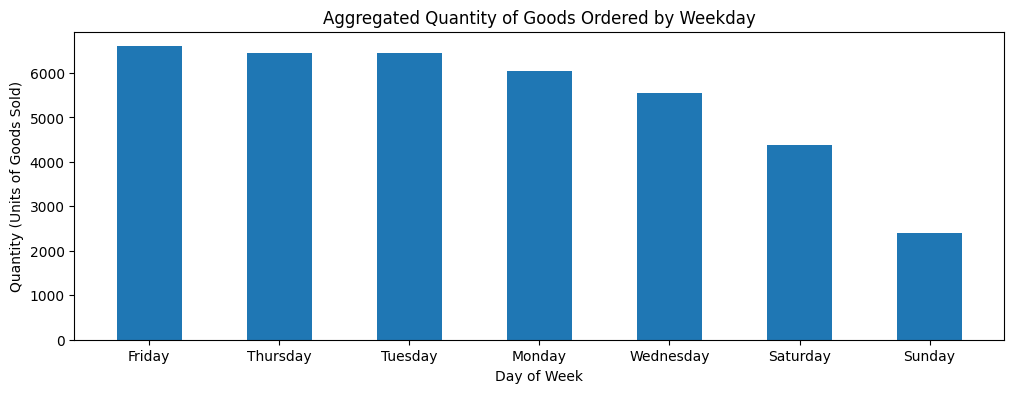

In [ ]:
cumulative_weekday

fig, ax = plt.subplots(figsize = (12,4))
ax.bar(cumulative_weekday.index, cumulative_weekday['quantity_ordered'], width = 0.5)
ax.set(title = "Aggregated Quantity of Goods Ordered by Weekday", xlabel = 'Day of Week', ylabel = 'Quantity (Units of Goods Sold)')

[Text(0.5, 1.0, 'Aggregated Profit by Weekday'),
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Profit Generated (in $)')]

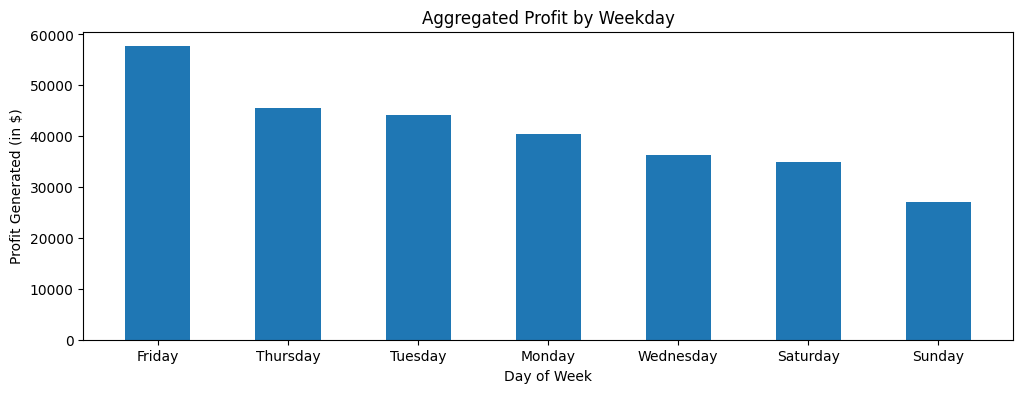

In [ ]:
cumulative_weekday

fig, ax = plt.subplots(figsize = (12,4))
ax.bar(cumulative_weekday.index, cumulative_weekday['gross_profit_less_discounts'], width = 0.5)
ax.set(title = "Aggregated Profit by Weekday", xlabel = 'Day of Week', ylabel = 'Profit Generated (in $)')

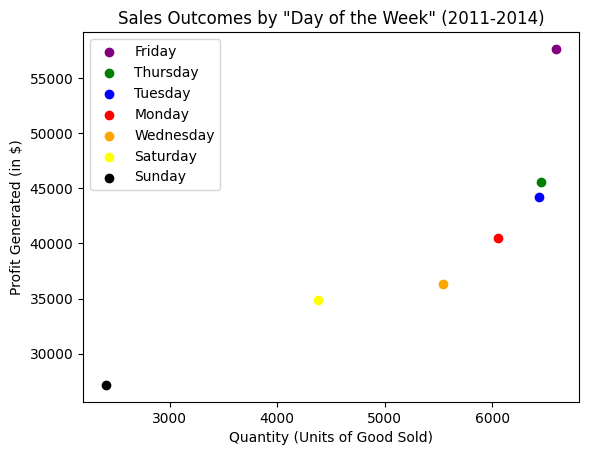

In [ ]:
#cumulative_weekday = cumulative_weekday.reset_index()

colors = {'Monday':'red', 'Tuesday': 'blue', 'Wednesday':'orange', 'Thursday':'green', 'Friday': 'purple', 'Saturday': 'yellow', 'Sunday': 'black'}

for day in cumulative_weekday['day_ordered']:
  filt = (cumulative_weekday['day_ordered'] == day)
  plt.scatter(cumulative_weekday.loc[filt, 'quantity_ordered'], cumulative_weekday.loc[filt, 'gross_profit_less_discounts'], c = colors[day], label = day)

plt.legend()
plt.xlabel('Quantity (Units of Good Sold)')
plt.ylabel('Profit Generated (in $)')
plt.title('Sales Outcomes by "Day of the Week" (2011-2014)')
plt.show()

In [ ]:
# Most profitable months?

In [ ]:
df_date = df.set_index('order_date')

In [ ]:
df_date['order_month'] = df_date.index.month_name()

df_date.groupby('order_month')['order_id'].unique().apply(len).sort_values(ascending = False) #months in which the most individual orders occured

order_month
November     628
September    565
December     559
May          418
March        405
October      403
August       387
June         385
April        375
July         352
January      278
February     254
Name: order_id, dtype: int64

In [ ]:
cum_month_agg = df_date.groupby('order_month').agg({'quantity_ordered':'sum', 'gross_profit_less_discounts':'sum'}).sort_values(by = ['gross_profit_less_discounts','quantity_ordered'], ascending = False)

cum_month_agg = pd.merge(cum_month_agg, pd.DataFrame(df_date.groupby('order_month')['order_id'].unique().apply(len)), how = 'left', on = 'order_month')

cum_month_agg.rename(columns = {'order_id':'total_individual_orders'}, inplace = True)

cum_month_agg.rename(columns = {'quantity_ordered':'Cumulative Goods Sold', 'gross_profit_less_discounts':'Cumulative Profit', 'total_individual_orders':'Total Orders Placed'})
#this is over all four years

,Cumulative Goods Sold,Cumulative Profit,Total Orders Placed
order_month,,,
September,4302,36045.8966,565
March,3093,35523.0867,405
December,4132,34996.7550,559
August,3107,24914.4554,387
November,4788,24004.7050,628
October,3081,23268.4253,403
June,2770,21729.1049,385
May,3144,20981.6013,418
February,1931,20410.5561,254


In [ ]:
filt = (df_date.index.year >= 2014)

df_d = df_date.loc[filt]

month_agg_14 = df_d.groupby('order_month').agg({'quantity_ordered':'sum', 'gross_profit_less_discounts':'sum'}).sort_values(by = ['gross_profit_less_discounts','quantity_ordered'], ascending = False)

month_agg_14 = pd.merge(month_agg_14, pd.DataFrame(df_d.groupby('order_month')['order_id'].unique().apply(len)), how = 'left', on = 'order_month')

month_agg_14.rename(columns = {'order_id':'total_individual_orders'}, inplace = True)

month_agg_14.rename(columns = {'quantity_ordered':'Goods Sold (2014)', 'gross_profit_less_discounts':'Profit Realized (2014)', 'total_individual_orders':'Total Orders Placed (2014)'})

,Goods Sold (2014),Profit Realized (2014),Total Orders Placed (2014)
order_month,,,
March,1247,14047.2219,150
September,1293,12347.1450,168
January,837,9519.7930,121
November,1466,9287.5185,211
October,1184,9125.3986,156
December,1230,8608.8258,175
June,902,8399.6258,117
August,995,7260.4549,126
July,798,5701.4371,109


In [ ]:
# LETS START WITH ANALYZING WHICH YEAR HAS BEEN THE MOST PROFITABLE VS LEAST PROFITABLE

In [ ]:
# Does this correlate with which Year(s) have had the most sales occur?

In [ ]:
profitable_year = pd.DataFrame(df_date.resample('Y')['gross_profit_less_discounts'].sum().sort_values(ascending = False)) #well this is good (already know that this could be way better tho)

In [ ]:
df_year_order_freq = pd.DataFrame(df_date.resample('Y')['order_id'].unique())

df_year_order_freq['total_orders'] = df_year_order_freq['order_id'].apply(len)

df_year_order_freq.drop(columns = 'order_id', inplace = True)

df_year_order_freq = df_year_order_freq.sort_values(by = 'total_orders', ascending = False)  #well this is good too! the more individual orders that have occured correlates preceisely with the
#more profitable years

In [ ]:
#lets check which year has had the most QUANTITY of goods. is this still consistent with the last two analyses?

yearly_quantities = pd.DataFrame(df_date.resample('Y')['quantity_ordered'].sum().sort_values(ascending = False)) #wow. honestly almost shocked that this is true!


In [ ]:
yearly_agg = pd.merge(profitable_year, df_year_order_freq, how = 'left', left_index = True, right_index = True)

yearly_agg = pd.merge(yearly_agg, yearly_quantities, how = 'left', left_index = True, right_index = True)

In [ ]:
yearly_agg.rename(columns = {'gross_profit_less_discounts':'Cumulative Profit', 'total_orders':'Total Orders Placed', 'quantity_ordered':'Total Goods Sold'}, inplace = True)

# Screenshot of Below

In [ ]:
yearly_agg #use to explain significance of R plot

,Cumulative Profit,Total Orders Placed,Total Goods Sold
order_date,,,
2014-12-31,93507.5131,1692,12503
2013-12-31,81726.9308,1310,9810
2012-12-31,61618.6037,1038,7979
2011-12-31,49543.9741,969,7581


In [ ]:
#because 2014 has been the most profitable year, profit for SS correlates with sales volume and quantity, I am going to focus here on the
#significance of what occurred in 2014 at the moment

In [ ]:
#df.sort_values(by = 'order_date').head(10)

In [ ]:
df_day = df_date[['quantity_ordered','gross_profit_less_discounts']].resample('D').sum().reset_index()

filt = (df_day['order_date'] >= '2014')

df_day = df_day.loc[filt].sort_values(by = ['gross_profit_less_discounts','quantity_ordered'], ascending = False)

df_day['sales_rank'] = range(1,(df_day.shape[0])+1)

#df_day = df_day.set_index('order_date')

df_day_q_14 = df_day.sort_values(by = 'quantity_ordered', ascending = False).head(15) #here is where we begin seeing the trouble when analyzing the data at a more granular level. clearly can see that
# quantity of goods sold per day and net sales do NOT correlate

In [ ]:
df_day_q_14.rename(columns = {'order_date':'Date','quantity_ordered':'Goods Sold','gross_profit_less_discounts':'Profit', 'sales_rank':'Sale Rank'}, inplace = True)

In [ ]:
df_day_14 = df_day_q_14.set_index('Date')

# SCREENSHOT OF BELOW

In [ ]:
df_day_14 #shows how quantity of goods sold typically leads to a high volume of sales but because of sales issues, can also seriously impact sales

,Goods Sold,Profit,Sale Rank
Date,,,
2014-03-12,152,-7.3410,302
2014-02-12,149,718.8920,48
2014-03-09,126,2600.1853,4
2014-10-12,120,1487.1418,16
2014-03-10,116,-1095.5167,358
2014-11-20,114,-1659.0309,362
2014-09-12,114,1154.6045,24
2014-11-25,110,935.9258,33
2014-09-16,110,1934.9693,10


In [ ]:
total_individual_order_by_day = df_date.resample('D')['order_id'].unique().apply(len)

df_2014_total_individual_order_day = pd.DataFrame(total_individual_order_by_day.loc[total_individual_order_by_day.index >= '2014'])

#df_2014_total_individual_order_day.rename(columns = {'order_id':'total_orders'}, inplace = True)

df_2014_total_individual_order_day.loc['2014-01-20']

order_id    3
Name: 2014-01-20 00:00:00, dtype: int64

In [ ]:
df_day = pd.merge(df_day, df_2014_total_individual_order_day, how = 'left', on = 'order_date')

In [ ]:
df_day = df_day[['order_date','order_id', 'quantity_ordered', 'gross_profit_less_discounts', 'sales_rank']]

df_day.rename(columns = {'order_id':'total_orders','quantity_ordered':'total_goods_sold'}, inplace = True)

df_day.set_index('order_date', inplace = True)


# ANALYZING HOLIDAYS

***Can now analyze a general over of each sale date in 2014***

In [ ]:
# January 1st

df_day.loc[['2014-01-01'], 'holiday'] = 'New Years' #not significant

In [ ]:
new_years = df_day.loc[['2014-01-01']]

In [ ]:
#mlk day
df_day.loc[['2014-01-20'], 'holiday'] = 'MLK Day' #not signigicant

mlk_day = df_day.loc[['2014-01-20']]

In [ ]:
#memorial day
df_day.loc[['2014-05-26'], 'holiday'] = 'Memorial Day'
memorial_day = df_day.loc[['2014-05-26']]#not significant

In [ ]:
#july 4th
df_day.loc[['2014-07-04'], 'holiday'] = 'July Fourth'
july_fourth = df_day.loc[['2014-07-04']]#not significant

In [ ]:
#labor day
df_day.loc[['2014-09-01'], 'holiday'] = 'Labor Day'
labor_day =  df_day.loc[['2014-09-01']]#not significant

In [ ]:
#columbus day
df_day.loc[['2014-10-13'],'holiday'] = 'Columbus Day'
columbus_day = df_day.loc[['2014-10-13']]

In [ ]:
#thanksviging
df_day.loc[['2014-11-27'], 'holiday'] = 'Thanksgiving Day'
thanksgiving = df_day.loc[['2014-11-27']] #GOOD

In [ ]:
#veterans day
df_day.loc[['2014-11-11'], 'holiday'] = 'Veterans Day'

veterans = df_day.loc[['2014-11-11']] #BAD

In [ ]:
#christmas
df_day.loc[['2014-12-25'], 'holiday'] = 'Christmas'

christmas =  df_day.loc[['2014-12-25']]#GOOD PROFITABLE DAY

In [ ]:
holidays = pd.concat([new_years, mlk_day, memorial_day, july_fourth, labor_day, columbus_day, thanksgiving, veterans, christmas], axis = 'rows')

In [ ]:
holidays #use to provide background on holidays graph

,total_orders,total_goods_sold,gross_profit_less_discounts,sales_rank,holiday
order_date,,,,,
2014-01-01,5,27,68.2435,202,New Years
2014-01-20,3,22,55.4043,214,MLK Day
2014-05-26,3,22,230.3317,127,Memorial Day
2014-07-04,2,8,44.0304,221,July Fourth
2014-09-01,1,2,80.3682,195,Labor Day
2014-10-13,10,78,526.1517,67,Columbus Day
2014-11-27,8,69,1251.3574,20,Thanksgiving Day
2014-11-11,9,64,-111.1302,333,Veterans Day
2014-12-25,11,54,1568.2397,14,Christmas


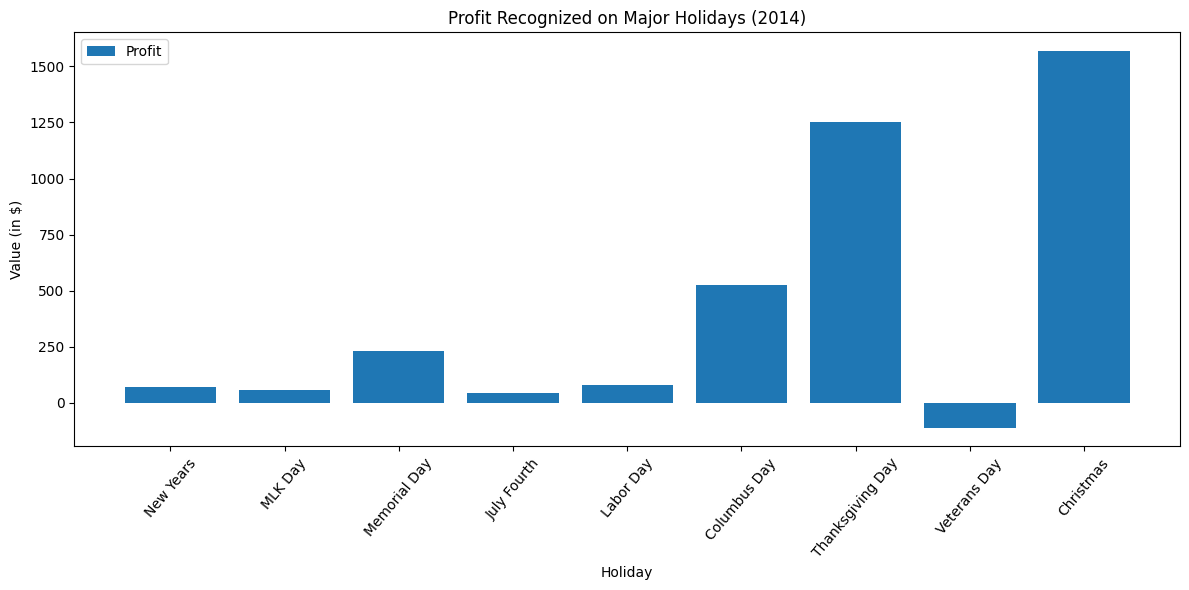

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(holidays['holiday'], holidays['gross_profit_less_discounts'], label='Profit')


plt.xlabel('Holiday')
plt.ylabel('Value (in $)')
plt.title('Profit Recognized on Major Holidays (2014)')
plt.xticks(rotation=50)
plt.legend()

plt.tight_layout()

# Now to analyze the products from top down

In [ ]:
df.head(3)

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,net_sales,cogs,gross_profit,discount_percent,discount_total,gross_profit_less_discounts,approx_defected_items,sales_issue,result_of_issue
0,CA-2011-115812,2011-09-06,Tuesday,2011-06-14,Standard Class,6,-84,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,4.9558,6.9800,7,0.0,48.8600,34.6906,14.1694,0.0,0.0000,14.1694,0,date_of_shipment entry error,uncertainty & no profit
1,CA-2011-115812,2011-09-06,Tuesday,2011-06-14,Standard Class,6,-84,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,1.3286,1.8200,4,0.0,7.2800,5.3144,1.9656,0.0,0.0000,1.9656,0,date_of_shipment entry error,uncertainty & no profit
2,CA-2011-115812,2011-09-06,Tuesday,2011-06-14,Standard Class,6,-84,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,136.0728,181.4304,6,0.0,1088.5824,816.4368,272.1456,0.2,181.4304,90.7152,1,date_of_shipment entry error & likely defects,uncertainty & no profit


Text(0.5, 1.0, 'Annual Profit by Year')

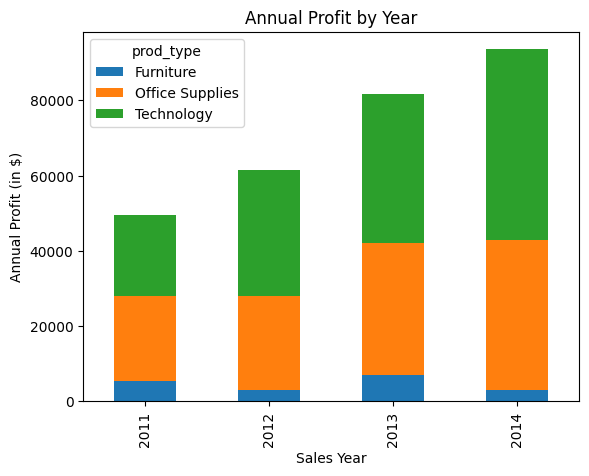

In [ ]:
year = df_date[['prod_type','gross_profit_less_discounts']]

year = year.pivot_table(index = year.index.year, columns = 'prod_type', values= 'gross_profit_less_discounts', aggfunc = 'sum')

year.plot.bar(stacked=True)
plt.xlabel("Sales Year")
plt.ylabel("Annual Profit (in $)")
plt.title("Annual Profit by Year")

In [ ]:
#starting on a cumulative year to year level

pd.DataFrame(df.groupby('prod_type')['gross_profit_less_discounts'].sum().sort_values(ascending = False)) #precision for above graph

,gross_profit_less_discounts
prod_type,
Technology,145454.9481
Office Supplies,122490.8008
Furniture,18451.2728


In [ ]:
filt = (df['discount_percent'] > 0)

df.loc[filt, 'discount_given'] = True

In [ ]:
filt = (df['discount_given'].isna())
df.loc[filt, 'discount_given'] = df['discount_given'].fillna(False)

In [ ]:
df_prod_types = pd.DataFrame(df.groupby('prod_type').agg({'prod_cost':'mean','prod_price':'mean','quantity_ordered':'sum','gross_profit_less_discounts':'sum','discount_given':'sum'})).sort_values(by = 'gross_profit_less_discounts', ascending = False)


df_prod_types.rename(columns = {'prod_cost':'mean_cost_good','prod_price':'mean_price_good','quantity_ordered':'total_goods_delivered','discount_given':'total_discounts_applied'}, inplace = True)

df_prod_types #this is where the real source of the issue starts peaking its head but we'll come back to this


,mean_cost_good,mean_price_good,total_goods_delivered,gross_profit_less_discounts,total_discounts_applied
prod_type,,,,,
Technology,94.215272,132.810740,6939,145454.9481,1014
Office Supplies,25.171933,34.322164,22906,122490.8008,2897
Furniture,85.267953,102.688971,8028,18451.2728,1285


In [ ]:
pd.set_option('display.max_columns', 32)

In [ ]:

p_type = pd.DataFrame(df.groupby('prod_sub-type')['prod_type'].unique())

p_type

,prod_type
prod_sub-type,
Accessories,[Technology]
Appliances,[Office Supplies]
Art,[Office Supplies]
Binders,[Office Supplies]
Bookcases,[Furniture]
Chairs,[Furniture]
Copiers,[Technology]
Envelopes,[Office Supplies]
Fasteners,[Office Supplies]


In [ ]:
# prod-sub types on a cumulative year to year level

#which product sub-type category results in the most net sales
sub_net_sales = pd.DataFrame(df.groupby('prod_sub-type').agg({'prod_cost':'mean','prod_price':'mean','quantity_ordered':'sum','gross_profit_less_discounts':'sum','discount_given':'sum'})).sort_values(by = 'gross_profit_less_discounts', ascending = False)

sub_net_sales['sales_rank'] = range(1,sub_net_sales.shape[0]+1)

s = pd.merge(sub_net_sales, p_type, how = 'left', left_index= True, right_index = True)

s_copy =s

In [ ]:
total_discounts = df['discount_total'].sum()

In [ ]:
total_disc_by_sub= pd.DataFrame(df.groupby('prod_sub-type')['discount_total'].sum())

In [ ]:
s_copy = pd.merge(s_copy,total_disc_by_sub, how = 'left', left_index = True, right_index = True)

In [ ]:
s_copy['allocated_discount_ratio'] = round(s_copy['discount_total']/total_discounts,3)*100

In [ ]:
s_copy = s_copy.drop(columns = 'discount_total')

In [ ]:
s_copy.rename(columns = {'prod_cost':'Cost', 'prod_price':'Price', 'quantity_ordered':'Sold', 'discount_given':'Discounts Given', 'sales_rank':'Profit Rank','prod_type':'Product Type', 'allocated_discount_ratio':'Percentage of Total Discounts'}, inplace = True)

In [ ]:
s_copy.rename(columns = {'Cost':'Average Cost', 'Price': 'Average Price'}, inplace = True)

In [ ]:
s_copy.rename(columns = {'gross_profit_less_discounts':'Total Profit'}, inplace = True)

# ScreenShot of Below

#good overview of the sub-types of products sold cumulatively

In [ ]:
s_copy

,Average Cost,Average Price,Sold,Total Profit,Discounts Given,Profit Rank,Product Type,Percentage of Total Discounts
prod_sub-type,,,,,,,,
Copiers,353.853605,648.004043,234,55617.8249,46,1,[Technology],5.6
Phones,83.450611,111.661484,3289,44515.7306,578,2,[Technology],14.9
Accessories,39.073685,56.499443,2976,41936.6357,304,3,[Technology],3.0
Paper,8.175556,15.940055,5178,34053.5693,513,4,[Office Supplies],1.6
Binders,28.095978,42.430974,5974,30221.7633,1186,5,[Office Supplies],13.6
Chairs,122.916050,154.995135,2356,26590.1663,484,6,[Furniture],15.4
Storage,61.803519,72.773210,3158,21278.8264,316,7,[Office Supplies],4.1
Appliances,48.520925,62.668333,1729,18138.0054,195,8,[Office Supplies],2.3
Furnishings,21.127006,27.173232,3563,13059.1436,386,9,[Furniture],2.7


In [ ]:
p_types = pd.DataFrame(df.groupby('prod_name').agg({'prod_sub-type':'unique','prod_type':'unique'}))

In [ ]:
#most profitable/least profitable products on a cumulative year to year level

#which product results in the most/least net sales
p_name_net_sales = df.groupby('prod_name').agg({'prod_cost':['mean','std'],'prod_price':['mean','std'],'quantity_ordered':'sum','discount_given':'sum','gross_profit_less_discounts':'sum'})

p_name_net_sales.columns = ['_'.join(col).strip() for col in p_name_net_sales.columns.values]



In [ ]:
p = pd.merge(p_name_net_sales,p_types, how = 'left', left_index= True, right_index = True)

In [ ]:
p

,prod_cost_mean,prod_cost_std,prod_price_mean,prod_price_std,quantity_ordered_sum,discount_given_sum,gross_profit_less_discounts_sum,prod_sub-type,prod_type
prod_name,,,,,,,,,
"""While you Were Out"" Message Book, One Form per Page",1.795640,0.102815,3.551707,0.163465,8,2,10.3880,[Paper],[Office Supplies]
"#10 Gummed Flap White Envelopes, 100/Box",2.230200,0.000000,4.047400,0.095378,11,2,16.7678,[Envelopes],[Office Supplies]
#10 Self-Seal White Envelopes,5.240025,0.831750,10.563225,0.786139,10,1,52.1230,[Envelopes],[Office Supplies]
"#10 White Business Envelopes,4 1/8 x 9 1/2",7.754411,0.731384,14.940226,0.844188,32,2,223.1408,[Envelopes],[Office Supplies]
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",4.462644,0.406537,8.430604,0.492899,37,4,115.2806,[Envelopes],[Office Supplies]
...,...,...,...,...,...,...,...,...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",15.084000,0.000000,20.614800,0.458992,24,2,115.6440,[Phones],[Technology]
iOttie HLCRIO102 Car Mount,18.006992,1.399757,18.046972,1.446923,12,3,-11.9940,[Phones],[Technology]
iOttie XL Car Mount,18.150920,2.035449,17.751120,2.035449,14,2,-50.3748,[Phones],[Technology]


In [ ]:
top_20 = p.sort_values(by = ('gross_profit_less_discounts_sum'), ascending = False).head(20) #top 20 products based on gross profit less discounts

In [ ]:
top_20

,prod_cost_mean,prod_cost_std,prod_price_mean,prod_price_std,quantity_ordered_sum,discount_given_sum,gross_profit_less_discounts_sum,prod_sub-type,prod_type
prod_name,,,,,,,,,
Canon imageCLASS 2200 Advanced Copier,1682.795192,187.933494,3222.790792,263.853751,20,2,25199.9280,[Copiers],[Technology]
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,587.705776,56.673424,1040.178216,326.283045,31,6,7753.0390,[Binders],[Office Supplies]
Hewlett Packard LaserJet 3310 Copier,263.245613,29.385950,515.241413,53.622316,38,6,6983.8836,[Copiers],[Technology]
Canon PC1060 Personal Laser Copier,337.395180,47.516897,645.390780,55.507044,19,3,4570.9347,[Copiers],[Technology]
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",1160.826700,50.517860,1574.991000,231.501917,12,1,4094.9766,[Machines],[Technology]
Ativa V4110MDD Micro-Cut Shredder,304.495650,74.245151,647.490750,74.245151,11,0,3772.9461,[Machines],[Technology]
"3D Systems Cube Printer, 2nd Generation, Magenta",961.992600,0.000000,1299.990000,0.000000,11,0,3717.9714,[Machines],[Technology]
Plantronics Savi W720 Multi-Device Wireless Headset System,221.463471,26.164789,402.299186,28.521299,24,2,3696.2820,[Accessories],[Technology]
Ibico EPK-21 Electric Binding System,933.655060,52.376939,1431.352427,655.642226,13,2,3345.2823,[Binders],[Office Supplies]


In [ ]:
bottom_20 = p.sort_values(by = ('gross_profit_less_discounts_sum'), ascending = False).tail(20) #least profitable products
bottom_20 = bottom_20.fillna(0)

bottom_20[('discount_given_sum')] = bottom_20[('discount_given_sum')].astype(int)

bottom_20 = bottom_20.sort_values(by = ('gross_profit_less_discounts_sum'))

# ANALYSIS 3 : How can we create less variation in profit on a period to period basis?


Looking closer into some of the individual products sold in 2014


In [ ]:
#may even be a good idea to compare the analysis in charts side by side for these products

# Everything below is now for 2014

#graphs to analyze these across the board

#focusing on 2014 because most relevant year and has been the most proftable. most goods sold. etc

In [ ]:
filt = (df['order_date'] >= '2014')

df_2014 = df.loc[filt]

In [ ]:
#net_sales across product type 2014

prod_net_sales = pd.DataFrame(df_2014.groupby('prod_type')['gross_profit_less_discounts'].sum().sort_values(ascending = False))

[Text(0.5, 1.0, 'Most Profitable Goods Sold By Product (Profit - 2014)'),
 Text(0.5, 0, 'Product Type'),
 Text(0, 0.5, 'Total Profit Generated (in $)')]

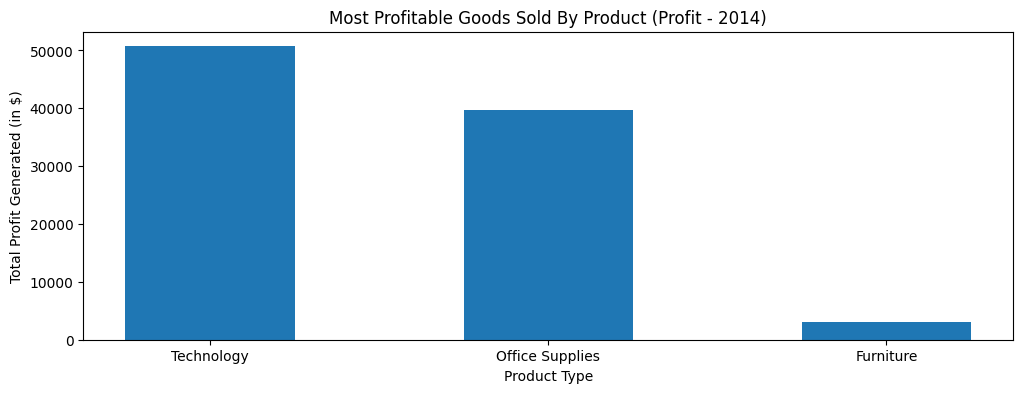

In [ ]:
fig, ax = plt.subplots(figsize = (12,4))
ax.bar(prod_net_sales.index, prod_net_sales['gross_profit_less_discounts'], width = 0.5)
ax.set(title = 'Most Profitable Goods Sold By Product (Profit - 2014)', xlabel = 'Product Type', ylabel = 'Total Profit Generated (in $)')

In [ ]:
df_14_prod_types = pd.DataFrame(df_2014.groupby('prod_type').agg({'prod_cost':'mean','prod_price':'mean','quantity_ordered':'sum','gross_profit_less_discounts':'sum','discount_given':'sum'})).sort_values(by = 'gross_profit_less_discounts', ascending = False)


df_14_prod_types.rename(columns = {'prod_cost':'Average Cost of Good','prod_price':'Average Product Price','quantity_ordered':'Total Goods Sold','discount_given':'Total # Discounts Given'}, inplace = True)

df_14_prod_types #to elaborate on product types sold in 2014

,Average Cost of Good,Average Product Price,Total Goods Sold,gross_profit_less_discounts,Total # Discounts Given
prod_type,,,,,
Technology,92.132886,131.689725,2366,50706.9348,342
Office Supplies,25.584902,34.334333,7700,39782.1870,974
Furniture,81.234417,97.523752,2437,3018.3913,412


<ipython-input-146-5b2d92935a99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_14.rename(columns = {'prod_type':'Product Type'}, inplace = True)


Text(0.5, 1.0, 'Total Discounts Given Each Month (in 2014)')

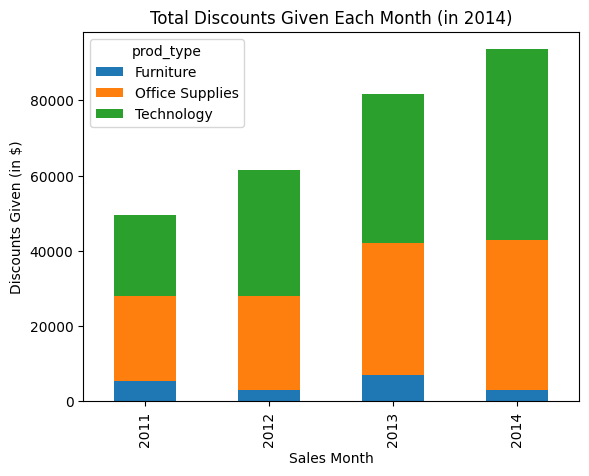

In [ ]:
year_14 = df_date[['prod_type','discount_total']]

year_14.rename(columns = {'prod_type':'Product Type'}, inplace = True)

year_14 = year_14.pivot_table(index = year_14.index.month, columns = 'Product Type', values= 'discount_total', aggfunc = 'sum')

year.plot.bar(stacked=True)
plt.xlabel("Sales Month")
plt.ylabel("Discounts Given (in $)")
plt.title("Total Discounts Given Each Month (in 2014)")



In [ ]:
p_type = pd.DataFrame(df_2014.groupby('prod_sub-type')['prod_type'].unique())

In [ ]:
#most profitable prod-sub types in 2014

#which product sub-type category results in the most net sales 2014
sub_14 = pd.DataFrame(df_2014.groupby('prod_sub-type').agg({'prod_cost':'mean','prod_price':'mean','quantity_ordered':'sum','gross_profit_less_discounts':'sum','discount_given':'sum'})).sort_values(by = 'gross_profit_less_discounts', ascending = False)

sub_14['profit_rank'] = range(1,sub_14.shape[0]+1)

s_14 = pd.merge(sub_14, p_type, how = 'left', left_index= True, right_index = True)

s_14

,prod_cost,prod_price,quantity_ordered,gross_profit_less_discounts,discount_given,profit_rank,prod_type
prod_sub-type,,,,,,,
Copiers,438.367505,832.181709,73,25031.7902,15,1,[Technology]
Accessories,38.405653,55.912409,1079,15672.3570,99,2,[Technology]
Phones,81.997190,109.118558,1093,12872.0032,202,3,[Technology]
Paper,8.495039,16.578567,1707,12049.0614,183,4,[Office Supplies]
Appliances,46.650979,60.798189,654,7865.2683,65,5,[Office Supplies]
Binders,30.410052,43.116529,2077,7737.0951,395,6,[Office Supplies]
Chairs,120.792129,151.792291,674,7643.5493,148,7,[Furniture]
Storage,59.524726,70.615201,1026,7367.5855,110,8,[Office Supplies]
Furnishings,20.659047,26.782227,1097,4099.1628,126,9,[Furniture]


In [ ]:
total_disc_14 = df_2014['discount_total'].sum()
total_disc_14

101398.21233400001

In [ ]:
total_disc_by_sub_14= pd.DataFrame(df_2014.groupby('prod_sub-type')['discount_total'].sum())
total_disc_by_sub_14

,discount_total
prod_sub-type,
Accessories,3106.774400
Appliances,2541.832400
Art,576.692800
Binders,17129.733900
Bookcases,4742.103159
Chairs,14277.170300
Copiers,6199.912000
Envelopes,230.444800
Fasteners,56.860800


In [ ]:
s_14 = pd.merge(s_14, total_disc_by_sub_14, how = 'left', left_index = True, right_index= True)

In [ ]:
s_14_copy = s_14

In [ ]:
s_14

,prod_cost,prod_price,quantity_ordered,gross_profit_less_discounts,discount_given,profit_rank,prod_type,discount_total
prod_sub-type,,,,,,,,
Copiers,438.367505,832.181709,73,25031.7902,15,1,[Technology],6199.912000
Accessories,38.405653,55.912409,1079,15672.3570,99,2,[Technology],3106.774400
Phones,81.997190,109.118558,1093,12872.0032,202,3,[Technology],16007.350400
Paper,8.495039,16.578567,1707,12049.0614,183,4,[Office Supplies],1830.577600
Appliances,46.650979,60.798189,654,7865.2683,65,5,[Office Supplies],2541.832400
Binders,30.410052,43.116529,2077,7737.0951,395,6,[Office Supplies],17129.733900
Chairs,120.792129,151.792291,674,7643.5493,148,7,[Furniture],14277.170300
Storage,59.524726,70.615201,1026,7367.5855,110,8,[Office Supplies],4055.592000
Furnishings,20.659047,26.782227,1097,4099.1628,126,9,[Furniture],2721.673600


In [ ]:
s_14['allocated discount cost (2014)'] = round(s_14['discount_total']/total_disc_14,3)*100

# Screenshot of Below for Overview of 2014 Product Sub Types

In [ ]:
s_14.rename(columns = {'prod_cost':'2014 Average Cost', 'prod_price':'2014 Average Price', 'quantity_ordered':'2014 Goods Sold','gross_profit_less_discounts':'2014 Total Profit','discount_given':'Freq of Discounts Applied (2014)','profit_rank':'2014 Profit Rank','prod_type':'Product Type','discount_total':'Total Cost of Discounts (2014)','allocated discount cost (2014)':'Percent of Discount Cost (2014)'}, inplace = True)

In [ ]:
#which product sub-type category is involved in the most orders

s_14.sort_values(by = '2014 Goods Sold', ascending = False)

,2014 Average Cost,2014 Average Price,2014 Goods Sold,2014 Total Profit,Freq of Discounts Applied (2014),2014 Profit Rank,Product Type,Total Cost of Discounts (2014),Percent of Discount Cost (2014)
prod_sub-type,,,,,,,,,
Binders,30.410052,43.116529,2077,7737.0951,395,6,[Office Supplies],17129.733900,16.9
Paper,8.495039,16.578567,1707,12049.0614,183,4,[Office Supplies],1830.577600,1.8
Art,5.760256,8.287217,1106,2227.1723,112,10,[Office Supplies],576.692800,0.6
Furnishings,20.659047,26.782227,1097,4099.1628,126,9,[Furniture],2721.673600,2.7
Phones,81.997190,109.118558,1093,12872.0032,202,3,[Technology],16007.350400,15.8
Accessories,38.405653,55.912409,1079,15672.3570,99,2,[Technology],3106.774400,3.1
Storage,59.524726,70.615201,1026,7367.5855,110,8,[Office Supplies],4055.592000,4.0
Chairs,120.792129,151.792291,674,7643.5493,148,7,[Furniture],14277.170300,14.1
Appliances,46.650979,60.798189,654,7865.2683,65,5,[Office Supplies],2541.832400,2.5


In [ ]:
#which product sub-type had the most discounts applied

s_14.sort_values(by = 'Freq of Discounts Applied (2014)', ascending = False)

,2014 Average Cost,2014 Average Price,2014 Goods Sold,2014 Total Profit,Freq of Discounts Applied (2014),2014 Profit Rank,Product Type,Total Cost of Discounts (2014),Percent of Discount Cost (2014)
prod_sub-type,,,,,,,,,
Binders,30.410052,43.116529,2077,7737.0951,395,6,[Office Supplies],17129.733900,16.9
Phones,81.997190,109.118558,1093,12872.0032,202,3,[Technology],16007.350400,15.8
Paper,8.495039,16.578567,1707,12049.0614,183,4,[Office Supplies],1830.577600,1.8
Chairs,120.792129,151.792291,674,7643.5493,148,7,[Furniture],14277.170300,14.1
Furnishings,20.659047,26.782227,1097,4099.1628,126,9,[Furniture],2721.673600,2.7
Art,5.760256,8.287217,1106,2227.1723,112,10,[Office Supplies],576.692800,0.6
Storage,59.524726,70.615201,1026,7367.5855,110,8,[Office Supplies],4055.592000,4.0
Accessories,38.405653,55.912409,1079,15672.3570,99,2,[Technology],3106.774400,3.1
Tables,165.997980,184.767205,390,-8140.6947,82,17,[Furniture],14873.403075,14.7


In [ ]:
df_2014.loc[df_2014['prod_name'].str.contains('Avery Hidden Tab')]

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,net_sales,cogs,gross_profit,discount_percent,discount_total,gross_profit_less_discounts,approx_defected_items,sales_issue,result_of_issue,discount_given
7896,CA-2014-125878,2014-02-26,Wednesday,2014-03-03,Standard Class,6,5,MH-18025,Michelle Huthwaite,Consumer,Chicago,Illinois,60623,Central,OFF-BI-10002609,Office Supplies,Binders,Avery Hidden Tab Dividers for Binding Systems,1.6092,1.0728,3,0.0,3.2184,4.8276,-1.6092,0.8,1.4304,-3.0396,1,defects & COGS,net loss,True


# Beginning Analysis for INDIVIDUAL Products


In [ ]:
p_types_14 = pd.DataFrame(df_2014.groupby('prod_name').agg({'prod_sub-type':'unique','prod_type':'unique'}))

In [ ]:
#most profitable/least profitable products in 2014

#which product results in the most/least net sales
p_name_net_sales_14 = df_2014.groupby('prod_name').agg({'prod_cost':['mean','std'],'prod_price':['mean','std'],'days_to_ship':['mean','median'],'quantity_ordered':'sum','discount_given':'sum','discount_percent':'mean','approx_defected_items':'sum','gross_profit_less_discounts':['sum','median']})

p_name_net_sales_14.columns = ['_'.join(col).strip() for col in p_name_net_sales_14.columns.values]


In [ ]:
p_14 = pd.merge(p_name_net_sales_14,p_types_14, how = 'left', left_index= True, right_index = True)

p_14 = p_14.fillna(0)

p_14[('discount_given_sum')] = p_14[('discount_given_sum')].astype(int)

p_14.sort_values(by = ('prod_cost_std'), ascending = False).head(5)

,prod_cost_mean,prod_cost_std,prod_price_mean,prod_price_std,days_to_ship_mean,days_to_ship_median,quantity_ordered_sum,discount_given_sum,discount_percent_mean,approx_defected_items_sum,gross_profit_less_discounts_sum,gross_profit_less_discounts_median,prod_sub-type,prod_type
prod_name,,,,,,,,,,,,,,
Canon imageCLASS 2200 Advanced Copier,1591.328787,198.154255,3224.657453,246.627220,3.0,2.0,11,1,0.066667,0,15679.9552,5039.9856,[Copiers],[Technology]
Lexmark MX611dhe Monochrome Laser Printer,1105.843495,119.005371,1190.842995,457.990368,49.0,49.0,7,2,0.400000,2,-2719.9840,-1359.9920,[Machines],[Technology]
Bady BDG101FRU Card Printer,510.393620,81.457683,662.391720,13.576280,90.5,90.5,6,2,0.300000,0,-47.9994,-23.9997,[Machines],[Technology]
GBC DocuBind P400 Electric Binding System,700.909850,48.118263,993.522700,423.440714,4.5,4.5,8,1,0.350000,1,1197.6712,598.8356,[Binders],[Office Supplies]
Plantronics Savi W720 Multi-Device Wireless Headset System,204.645750,44.754556,390.303750,44.754556,2.0,2.0,6,0,0.000000,0,1113.9480,556.9740,[Accessories],[Technology]


In [ ]:
p_14 = p_14.sort_values(by = ('gross_profit_less_discounts_sum'), ascending = False)

p_14['profit_rank'] = range(1,p_14.shape[0]+1)

In [ ]:
#most_profitable products sold in 2014 by total

top_20_14 = p_14.sort_values(by = ('gross_profit_less_discounts_sum'), ascending = False).head(20)

top_20_14 = top_20_14.copy()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Hewlett Packard LaserJet 3310 Copier'),
  Text(2, 0, 'GBC DocuBind TL300 Electric Binding System'),
  Text(3, 0, 'Fellowes PB300 Plastic Comb Binding Machine'),
  Text(4, 0, 'Canon Image Class D660 Copier'),
  Text(5, 0, 'Canon Imageclass D680 Copier / Fax'),
  Text(6, 0, 'Hewlett-Packard Desktjet 6988DT Refurbished Printer')])

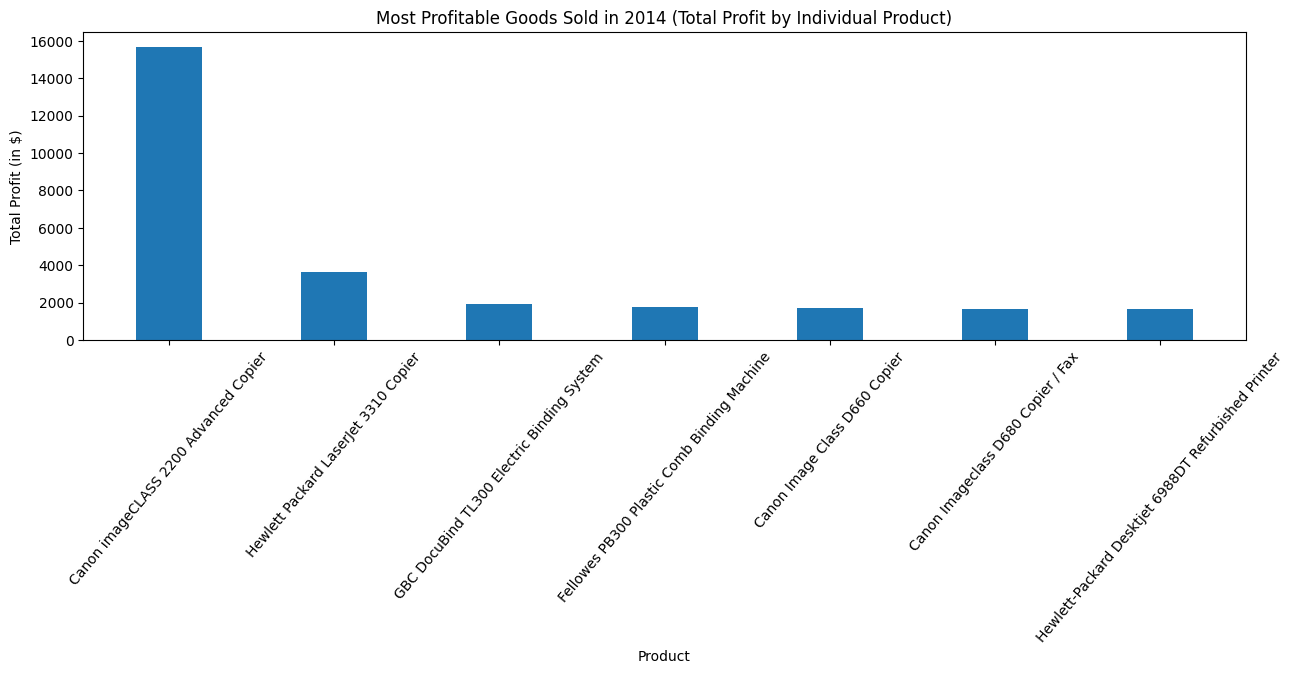

In [ ]:
top_14 =top_20_14.head(7)

fig, ax = plt.subplots(figsize = (15,4))
ax.bar(top_14.index, top_14[('gross_profit_less_discounts_sum')], width = 0.4)
ax.set(title = "Most Profitable Goods Sold in 2014 (Total Profit by Individual Product)", xlabel = 'Product', ylabel = 'Total Profit (in $)')
plt.xticks(rotation = 50)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Hewlett-Packard Desktjet 6988DT Refurbished Printer'),
  Text(2, 0, '3D Systems Cube Printer, 2nd Generation, Magenta'),
  Text(3, 0, 'Hewlett Packard LaserJet 3310 Copier'),
  Text(4, 0, 'GBC DocuBind 200 Manual Binding Machine'),
  Text(5, 0, 'Canon Image Class D660 Copier'),
  Text(6, 0, 'GBC DocuBind TL300 Electric Binding System')])

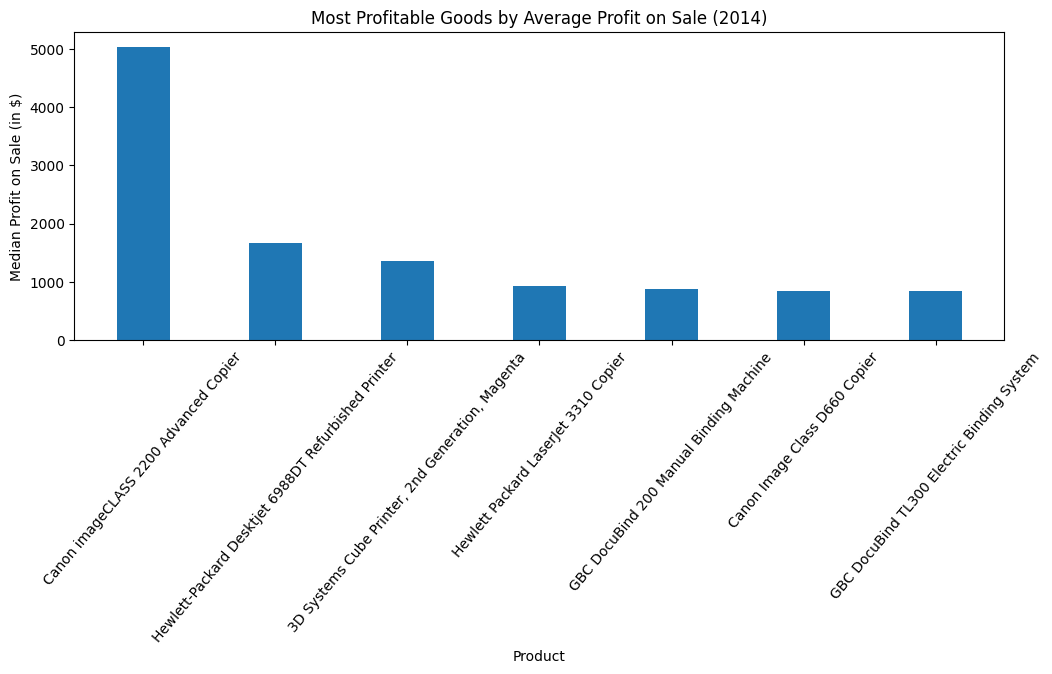

In [ ]:
top_20_14 = p_14.sort_values(by = ('gross_profit_less_discounts_median'), ascending = False).head(7)


fig, ax = plt.subplots(figsize = (12,4))
ax.bar(top_20_14.index, top_20_14[('gross_profit_less_discounts_median')], width = 0.4)
ax.set(title = "Most Profitable Goods by Average Profit on Sale (2014)", xlabel = 'Product', ylabel = 'Median Profit on Sale (in $)')
plt.xticks(rotation = 50)

In [ ]:
filt = (df_2014['prod_name'] == 'Canon imageCLASS 2200 Advanced Copier')

df_2014.loc[filt]

,order_id,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,net_sales,cogs,gross_profit,discount_percent,discount_total,gross_profit_less_discounts,approx_defected_items,sales_issue,result_of_issue,discount_given
order_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-10-23,CA-2014-127180,Thursday,2014-10-25,First Class,3,2,TA-21385,Tom Ashbrook,Home Office,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,1483.99576,3023.99136,4,1343.99616,13439.9616,7279.9792,6159.9824,0.2,2239.9936,3919.9888,0,random discount,net sales decrease,True
2014-11-18,CA-2014-166709,Tuesday,2014-11-23,Standard Class,6,5,HL-15040,Hunter Lopez,Consumer,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,1819.99480,3499.99000,3,0.00000,10499.9700,5459.9844,5039.9856,0.0,0.0000,5039.9856,0,none,none,False
2014-03-24,CA-2014-140151,Monday,2014-03-26,First Class,3,2,RB-19360,Raymond Buch,Consumer,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,1469.99580,3149.99100,4,1399.99600,13999.9600,7279.9792,6719.9808,0.0,0.0000,6719.9808,0,none,none,False


In [ ]:
#least profitable products sold in 2014

bottom_20_14 = p_14.sort_values(by = ('gross_profit_less_discounts_sum'), ascending = True).head(3)

bottom_20_14 #use to elaborate on upcoming charts

,prod_cost_mean,prod_cost_std,prod_price_mean,prod_price_std,days_to_ship_mean,days_to_ship_median,quantity_ordered_sum,discount_given_sum,discount_percent_mean,approx_defected_items_sum,gross_profit_less_discounts_sum,gross_profit_less_discounts_median,prod_sub-type,prod_type,profit_rank
prod_name,,,,,,,,,,,,,,,
Cubify CubeX 3D Printer Triple Head Print,2509.993725,0.000000,2549.993625,0.000000,0.0,0.0,4,1,0.5,1,-3839.9904,-3839.9904,[Machines],[Technology],1503
Ibico EPK-21 Electric Binding System,963.894900,0.000000,680.396400,0.000000,124.0,124.0,5,1,0.8,0,-2929.4845,-2929.4845,[Binders],[Office Supplies],1502
Lexmark MX611dhe Monochrome Laser Printer,1105.843495,119.005371,1190.842995,457.990368,49.0,49.0,7,2,0.4,2,-2719.9840,-1359.9920,[Machines],[Technology],1501


In [ ]:
import numpy as np

([0, 1, 2],
 [Text(0, 0, 'Cubify CubeX 3D Printer Triple Head Print'),
  Text(1, 0, 'Ibico EPK-21 Electric Binding System'),
  Text(2, 0, 'Lexmark MX611dhe Monochrome Laser Printer')])

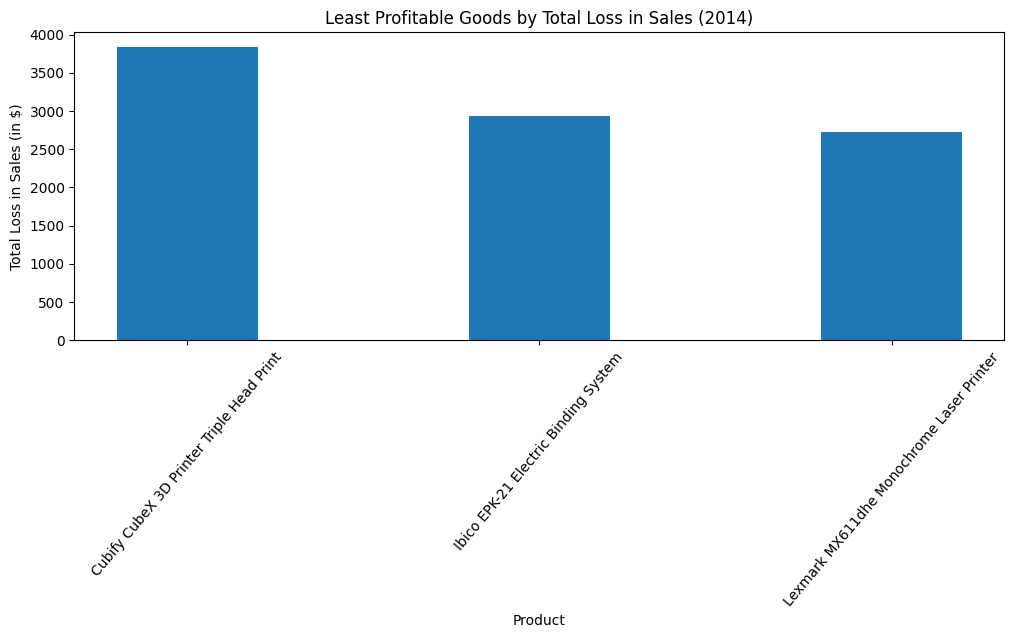

In [ ]:
bottom_20_14 = p_14.sort_values(by = ('gross_profit_less_discounts_sum'), ascending = True).head(3)


fig, ax = plt.subplots(figsize = (12,4))
ax.bar(bottom_20_14.index, np.abs(bottom_20_14[('gross_profit_less_discounts_sum')]), width = 0.4)
ax.set(title = "Least Profitable Goods by Total Loss in Sales (2014)", xlabel = 'Product', ylabel = 'Total Loss in Sales (in $)')
plt.xticks(rotation = 50)

([0, 1, 2],
 [Text(0, 0, 'Cubify CubeX 3D Printer Triple Head Print'),
  Text(1, 0, 'Ibico EPK-21 Electric Binding System'),
  Text(2, 0, 'Lexmark MX611dhe Monochrome Laser Printer')])

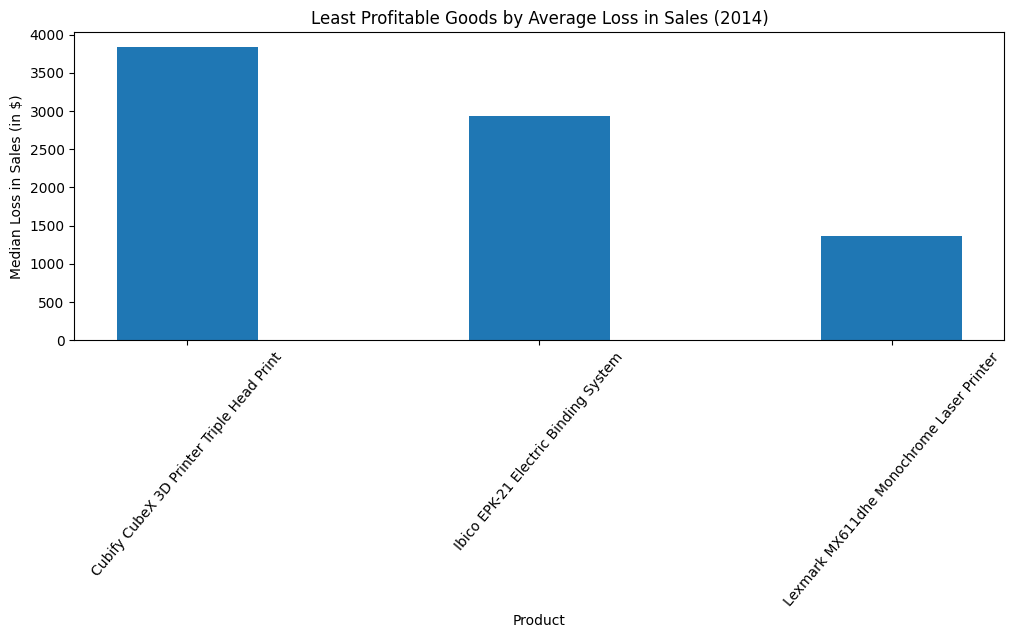

In [ ]:
bottom_20_14 = p_14.sort_values(by = ('gross_profit_less_discounts_median'), ascending = True).head(3)


fig, ax = plt.subplots(figsize = (12,4))
ax.bar(bottom_20_14.index, np.abs(bottom_20_14[('gross_profit_less_discounts_median')]), width = 0.4)
ax.set(title = "Least Profitable Goods by Average Loss in Sales (2014)", xlabel = 'Product', ylabel = 'Median Loss in Sales (in $)')
plt.xticks(rotation = 50)

In [ ]:
#products sold with largest standard deviation in cost

largest_std = p_14.sort_values(by = ('prod_cost_std'), ascending = False).head(20)

largest_std #use to elaborate on upcoming charts

,prod_cost_mean,prod_cost_std,prod_price_mean,prod_price_std,days_to_ship_mean,days_to_ship_median,quantity_ordered_sum,discount_given_sum,discount_percent_mean,approx_defected_items_sum,gross_profit_less_discounts_sum,gross_profit_less_discounts_median,prod_sub-type,prod_type,profit_rank
prod_name,,,,,,,,,,,,,,,
Canon imageCLASS 2200 Advanced Copier,1591.328787,198.154255,3224.657453,246.627220,3.000000,2.0,11,1,0.066667,0,15679.9552,5039.98560,[Copiers],[Technology],1
Lexmark MX611dhe Monochrome Laser Printer,1105.843495,119.005371,1190.842995,457.990368,49.000000,49.0,7,2,0.400000,2,-2719.9840,-1359.99200,[Machines],[Technology],1501
Bady BDG101FRU Card Printer,510.393620,81.457683,662.391720,13.576280,90.500000,90.5,6,2,0.300000,0,-47.9994,-23.99970,[Machines],[Technology],1385
GBC DocuBind P400 Electric Binding System,700.909850,48.118263,993.522700,423.440714,4.500000,4.5,8,1,0.350000,1,1197.6712,598.83560,[Binders],[Office Supplies],14
Plantronics Savi W720 Multi-Device Wireless Headset System,204.645750,44.754556,390.303750,44.754556,2.000000,2.0,6,0,0.000000,0,1113.9480,556.97400,[Accessories],[Technology],17
GBC DocuBind TL300 Electric Binding System,448.315602,40.216774,686.914942,233.102143,-7.200000,5.0,19,3,0.320000,3,1910.5887,843.17060,[Binders],[Office Supplies],3
Martin Yale Chadless Opener Electric Letter Opener,774.929705,34.009524,774.929705,24.151490,4.500000,4.5,16,2,0.100000,1,-1232.5588,-133.24960,[Supplies],[Office Supplies],1499
Balt Solid Wood Round Tables,383.981400,31.571611,388.446300,18.942966,48.000000,48.0,9,1,0.200000,2,-888.5151,-444.25755,[Tables],[Furniture],1492
Bretford CR4500 Series Slim Rectangular Table,246.184470,31.023928,282.746520,48.259444,2.500000,2.5,9,2,0.350000,1,-393.4773,-196.73865,[Tables],[Furniture],1483


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Canon imageCLASS 2200 Advanced Copier'),
  Text(1, 0, 'Lexmark MX611dhe Monochrome Laser Printer'),
  Text(2, 0, 'Bady BDG101FRU Card Printer'),
  Text(3, 0, 'GBC DocuBind P400 Electric Binding System'),
  Text(4, 0, 'Plantronics Savi W720 Multi-Device Wireless Headset System')])

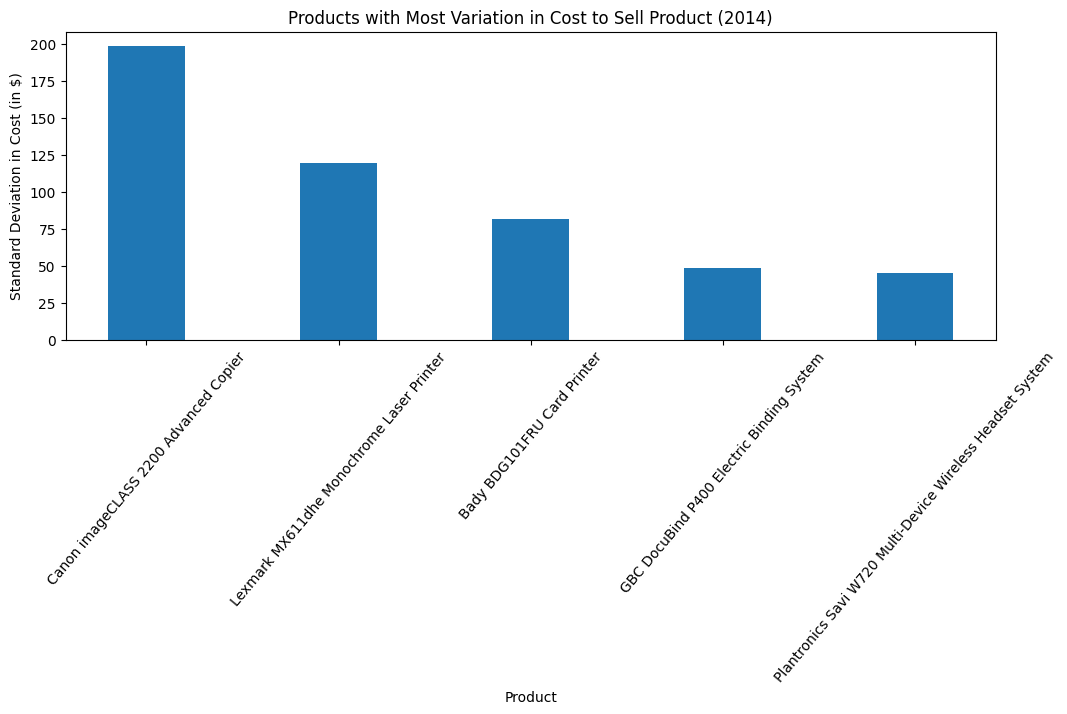

In [ ]:
largest_std = largest_std.head(5) #products with largest variation in cost 2014


fig, ax = plt.subplots(figsize = (12,4))
ax.bar(largest_std.index, largest_std[('prod_cost_std')], width = 0.4)
ax.set(title = "Products with Most Variation in Cost to Sell Product (2014)", xlabel = 'Product', ylabel = 'Standard Deviation in Cost (in $)')
plt.xticks(rotation = 50)

In [ ]:
#products sold that take longest to ship based on median

longest_ship = p_14.sort_values(by = ('days_to_ship_median'), ascending = False).head(20)

longest_7 = longest_ship.head(7)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Adams Telephone Message Books, 5 1/4\x94 x 11\x94'),
  Text(1, 0, 'Xerox 206'),
  Text(2, 0, 'VTech DS6151'),
  Text(3, 0, 'Belkin F9H710-06 7 Outlet SurgeMaster Surge Protector'),
  Text(4, 0, 'Personal Creations Ink Jet Cards and Labels'),
  Text(5, 0, 'Acme Softgrip Scissors'),
  Text(6, 0, 'Ooma Telo VoIP Home Phone System')])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 148 (\x94) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


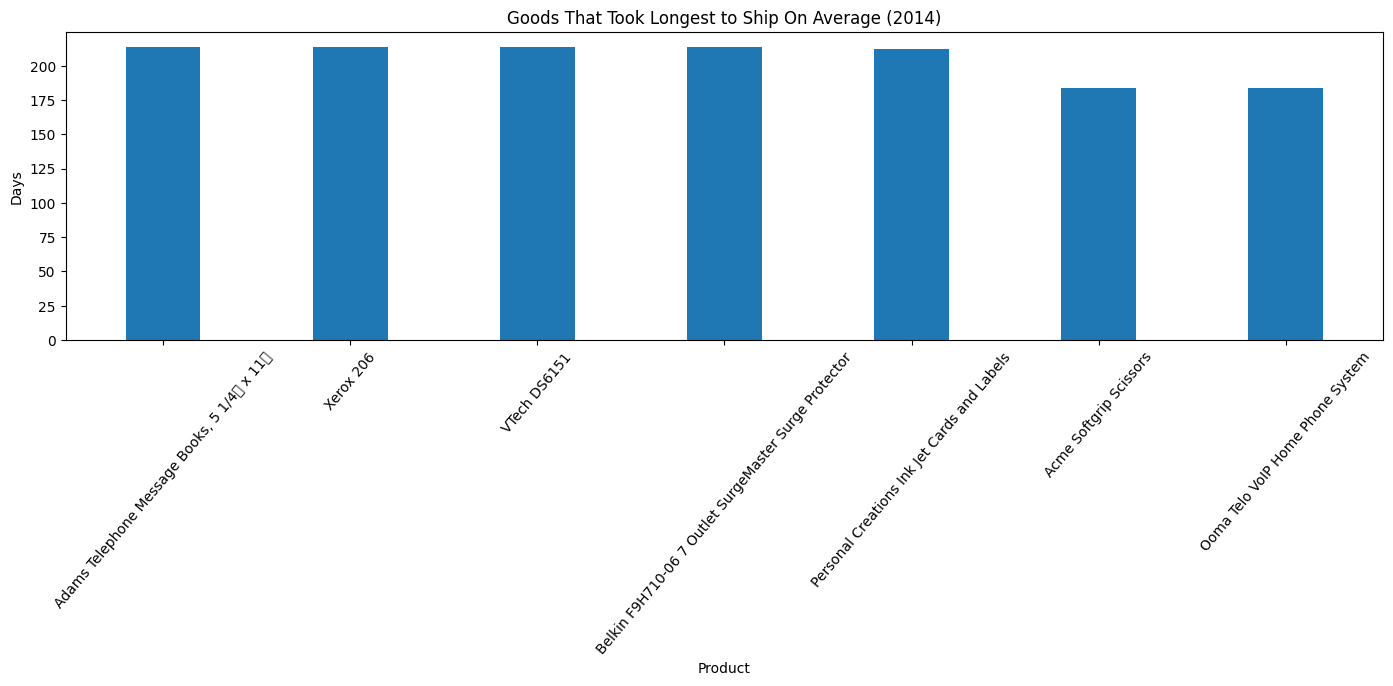

In [ ]:
fig, ax = plt.subplots(figsize = (17,4))
ax.bar(longest_7.index, longest_7[('days_to_ship_median')], width = 0.4)
ax.set(title = "Goods That Took Longest to Ship On Average (2014)", xlabel = 'Product', ylabel = 'Days')
plt.xticks(rotation = 50)

In [ ]:
#most quantity ordered

most_ordered = p_14.sort_values(by = ('quantity_ordered_sum'), ascending = False).head(20)

most_ordered_5 = most_ordered.head(5)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Storex Dura Pro Binders'),
  Text(2, 0, 'Eldon Wave Desk Accessories'),
  Text(3, 0, 'Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive'),
  Text(4, 0, 'Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table')])

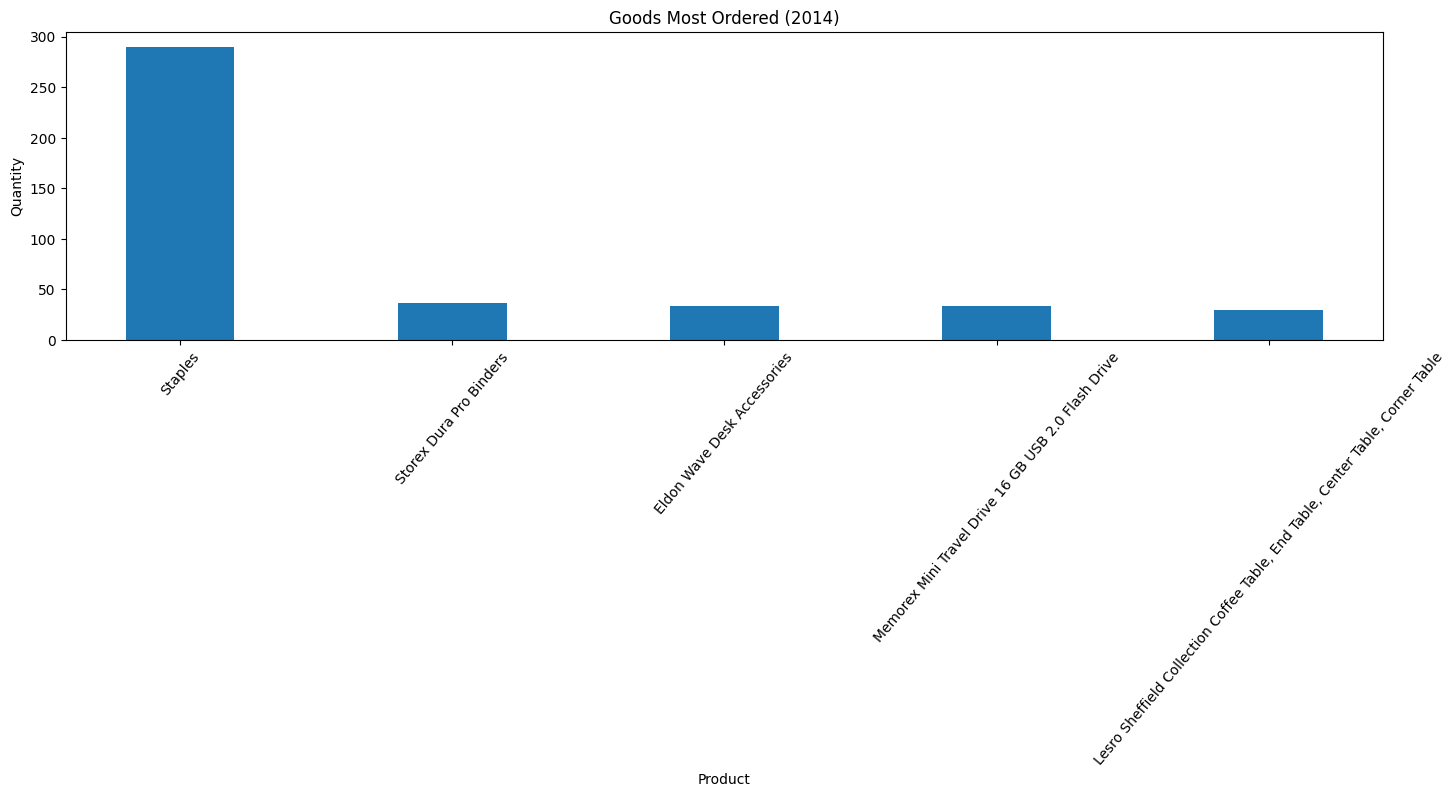

In [ ]:
fig, ax = plt.subplots(figsize = (17,4))
ax.bar(most_ordered_5.index, most_ordered_5[('quantity_ordered_sum')], width = 0.4)
ax.set(title = "Goods Most Ordered (2014)", xlabel = 'Product', ylabel = 'Quantity')
plt.xticks(rotation = 50)

In [ ]:
#most discounts given

most_discounts_given = p_14.sort_values(by = ('discount_given_sum'), ascending = False).head(5)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Staples'),
  Text(1, 0, "Global Wood Trimmed Manager's Task Chair, Khaki"),
  Text(2, 0, 'Storex Dura Pro Binders'),
  Text(3, 0, 'Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table'),
  Text(4, 0, 'Vinyl Sectional Post Binders')])

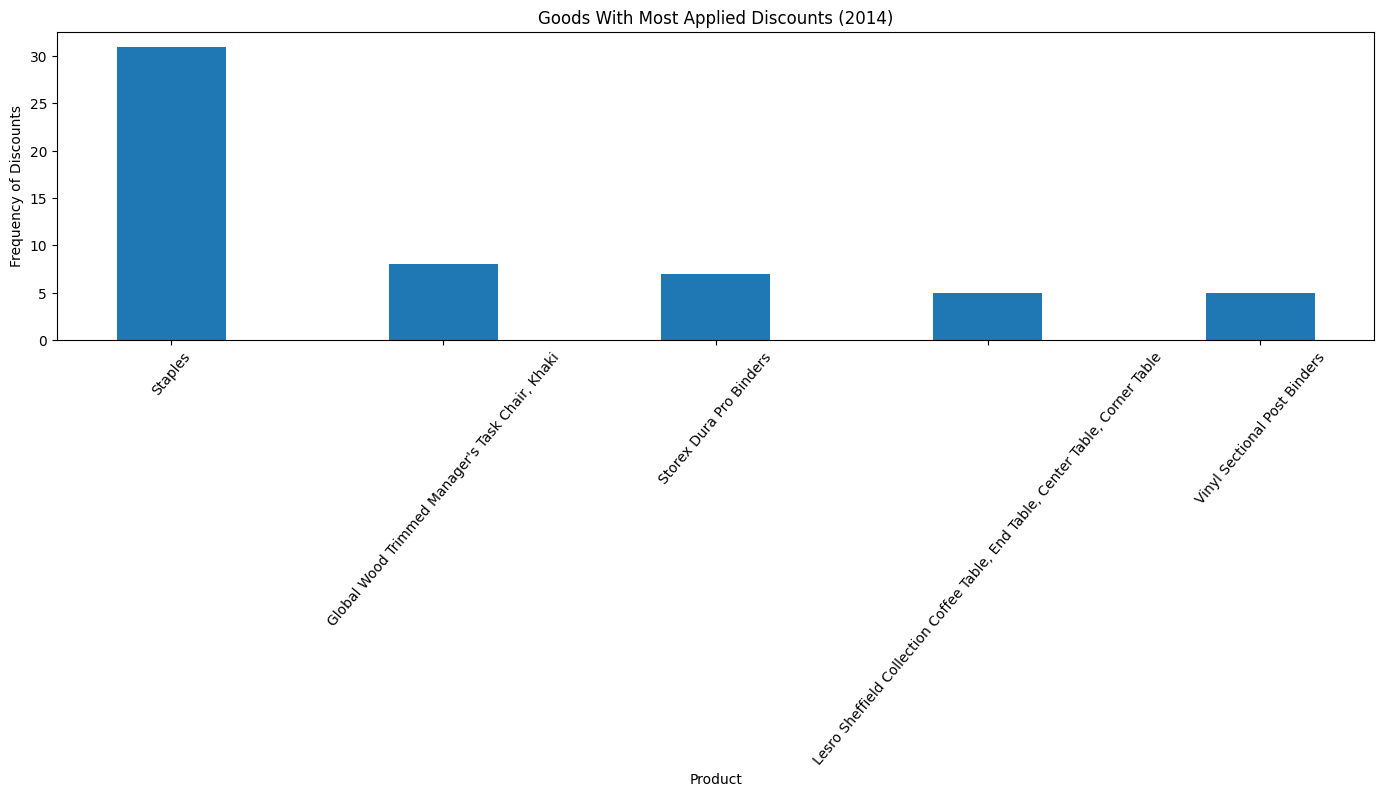

In [ ]:
fig, ax = plt.subplots(figsize = (17,4))
ax.bar(most_discounts_given.index, most_discounts_given[('discount_given_sum')], width = 0.4)
ax.set(title = "Goods With Most Applied Discounts (2014)", xlabel = 'Product', ylabel = 'Frequency of Discounts')
plt.xticks(rotation = 50)

In [ ]:
#highest discount percentage given on aver

highest_discount_avg = p_14.sort_values(by = ('discount_percent_mean'), ascending = False).head(5)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'GBC Twin Loop Wire Binding Elements, 9/16" Spine, Black'),
  Text(1, 0, 'GBC Ibimaster 500 Manual ProClick Binding System'),
  Text(2, 0, 'Eureka Sanitaire  Commercial Upright'),
  Text(3, 0, 'Belkin F9S820V06 8 Outlet Surge'),
  Text(4, 0, 'Computer Printout Index Tabs')])

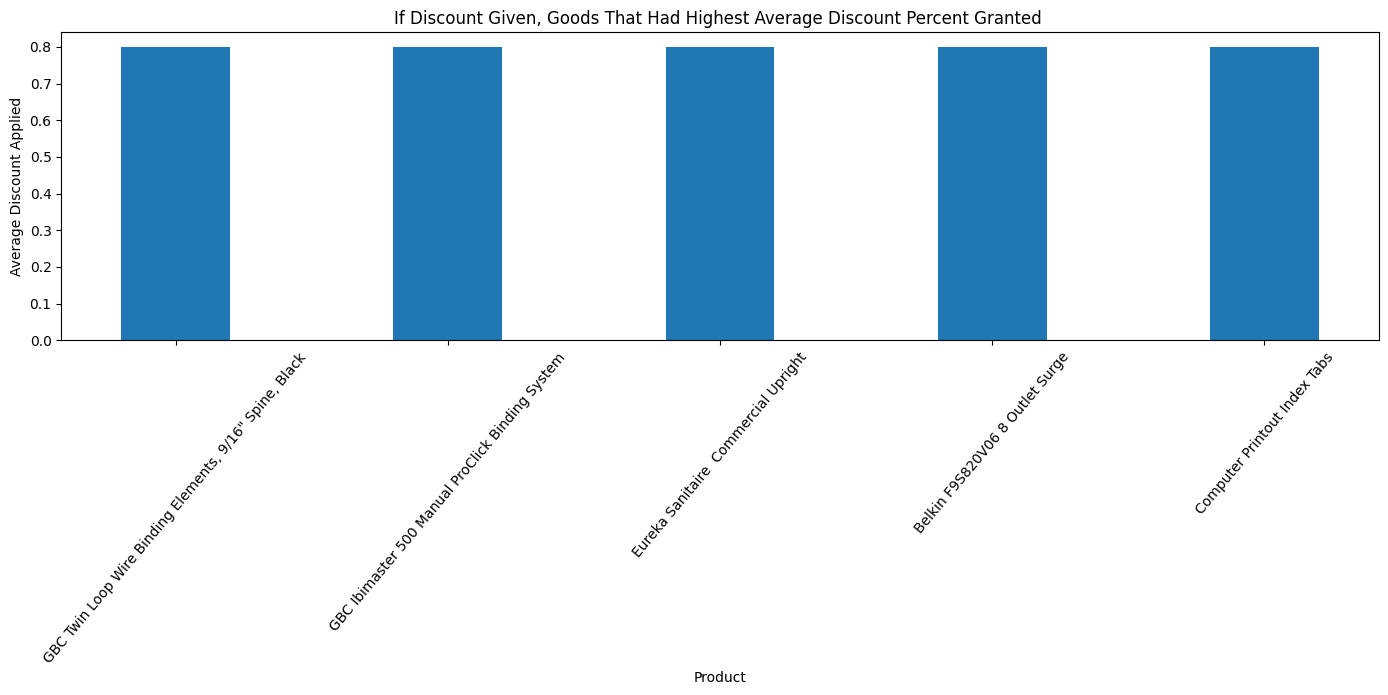

In [ ]:
fig, ax = plt.subplots(figsize = (17,4))
ax.bar(highest_discount_avg.index, highest_discount_avg[('discount_percent_mean')], width = 0.4)
ax.set(title = "If Discount Given, Goods That Had Highest Average Discount Percent Granted ", xlabel = 'Product', ylabel = 'Average Discount Applied')
plt.xticks(rotation = 50)

In [ ]:
#most defected items (customers seemingly unhappy with product thus discount applied)

most_defects= p_14.sort_values(by = ('approx_defected_items_sum'), ascending = False).head(5)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Wilson Jones Century Plastic Molded Ring Binders'),
  Text(1, 0, 'Fellowes Twister Kit, Gray/Clear, 3/pkg'),
  Text(2, 0, 'Belkin F9S820V06 8 Outlet Surge'),
  Text(3, 0, 'Acco 6 Outlet Guardian Premium Plus Surge Suppressor'),
  Text(4, 0, 'Wilson Jones Easy Flow II Sheet Lifters')])

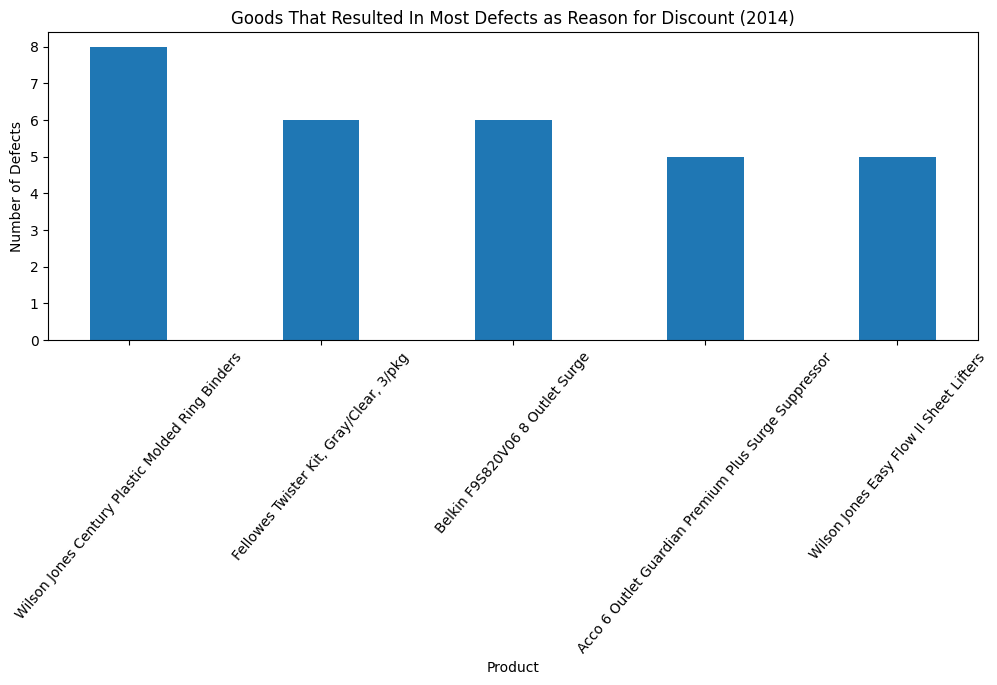

In [ ]:
fig, ax = plt.subplots(figsize = (12,4))
ax.bar(most_defects.index, most_defects[('approx_defected_items_sum')], width = 0.4)
ax.set(title = "Goods That Resulted In Most Defects as Reason for Discount (2014)", xlabel = 'Product', ylabel = 'Number of Defects')
plt.xticks(rotation = 50)

# Overview Analysis of 2014 vs General

In [ ]:
df_2014 = df.loc[df['order_date']>='2014']

In [ ]:
df_2014.loc[df_2014['sales_issue'] == 'COGS'] #explain on this why somewhat misleading that COGS has "0 loss in sales"

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,net_sales,cogs,gross_profit,discount_percent,discount_total,gross_profit_less_discounts,approx_defected_items,sales_issue,result_of_issue,discount_given
7444,CA-2014-147956,2014-12-25,Thursday,2015-01-01,Standard Class,6,7,AH-10210,Alan Hwang,Consumer,Seattle,Washington,98105,West,OFF-ST-10001097,Office Supplies,Storage,Office Impressions Heavy Duty Welded Shelving ...,167.2700,167.2700,6,0.0000,1003.62,1003.62,0.0,0.0,0.0,0.0,0,COGS,no profit,False
7915,CA-2014-129000,2014-11-26,Wednesday,2014-11-28,Second Class,4,2,SZ-20035,Sam Zeldin,Home Office,Canton,Michigan,48187,Central,OFF-ST-10001097,Office Supplies,Storage,Office Impressions Heavy Duty Welded Shelving ...,158.9065,158.9065,3,25.0905,501.81,501.81,0.0,0.0,0.0,0.0,0,COGS,no profit,False
8527,CA-2014-142342,2014-07-18,Friday,2014-07-20,Second Class,4,2,AJ-10795,Anthony Johnson,Corporate,Apple Valley,California,92307,West,OFF-ST-10002957,Office Supplies,Storage,Sterilite Show Offs Storage Containers,5.0160,5.0160,2,0.5280,10.56,10.56,0.0,0.0,0.0,0.0,0,COGS,no profit,False
8918,CA-2014-124205,2014-09-16,Tuesday,2014-09-20,Standard Class,6,4,TC-21145,Theresa Coyne,Corporate,Lakewood,New Jersey,8701,East,OFF-ST-10000934,Office Supplies,Storage,"Contico 72""H Heavy-Duty Storage System",40.9800,40.9800,2,0.0000,81.96,81.96,0.0,0.0,0.0,0.0,0,COGS,no profit,False


In [ ]:
df_2014 = df_2014.set_index('order_date')

In [ ]:
df_2014['sales_issue'].value_counts()

sales_issue
major delayed shipment                                  921
none                                                    836
random discount                                         621
date_of_shipment entry error                            457
defects & COGS                                          134
defects                                                 121
random discount & COGS                                   81
major delayed shipment & COGS                            56
date_of_shipment entry error & likely defects            48
date_of_shipment entry error & COGS                      20
date_of_shipment entry error & likely defects & COGS     17
COGS                                                      4
delayed same day delivery                                 3
Name: count, dtype: int64

In [ ]:
_14 = pd.DataFrame(df_2014['sales_issue'].value_counts())

_14.rename(columns = {'count':'sale_issues_2014'},inplace = True)

In [ ]:
_14.head()

,sale_issues_2014
sales_issue,
major delayed shipment,921
none,836
random discount,621
date_of_shipment entry error,457
defects & COGS,134


In [ ]:
cum_sales_issues = pd.DataFrame(df['sales_issue'].value_counts())

cum_sales_issues.rename(columns = {'count':'tot_sale_issues'}, inplace = True)

In [ ]:
cum_vs_14 = pd.merge(_14, cum_sales_issues, how = 'left', left_index = True, right_index = True)

In [ ]:
cum_vs_14.head()

,sale_issues_2014,tot_sale_issues
sales_issue,,
major delayed shipment,921,2647
none,836,2488
random discount,621,1883
date_of_shipment entry error,457,1461
defects & COGS,134,399


In [ ]:
cum_vs_14['2014_ratio'] = round(cum_vs_14['sale_issues_2014']/cum_vs_14['tot_sale_issues'],3)*100

In [ ]:
cum_vs_14.rename(columns = {'sales_issue_2014':'Occurences (2014)','sales_issue':'Occurences (2011-2014)','2014_ratio':'Percentage of Occurences (2014)'}, inplace = True)

In [ ]:
resulting_discounts_14 = pd.DataFrame(df_2014.groupby('sales_issue')['discount_total'].sum().sort_values(ascending = False))

In [ ]:
cum_vs_14.head(2)

,sale_issues_2014,tot_sale_issues,Percentage of Occurences (2014)
sales_issue,,,
major delayed shipment,921,2647,34.8
none,836,2488,33.6


In [ ]:
cum_vs_14 = pd.merge(cum_vs_14, resulting_discounts_14, how = 'left', left_index = True, right_index = True)

In [ ]:
cum_vs_14.rename(columns = {'Percentage of Occurences (2014)':'Percentage of Occurrences (Ratio of 2014 over 2011-2014)'}, inplace = True)

In [ ]:
cum_vs_14.rename(columns = {'discount_total':'Total Loss in Sales (2014)'}, inplace = True)

In [ ]:
cum_vs_14['Total Loss in Sales (2014)'] = round(cum_vs_14['Total Loss in Sales (2014)'],2)

In [ ]:
cum_vs_14.rename(columns = {'sale_issues_2014': 'Occurrences (2014)', 'tot_sale_issues':'Occurrences (2011-2014)'},inplace = True)

In [ ]:
cum_vs_14.rename(columns = {'Total Loss in Sales (2014)':'Profit Lost Due to Issue (2014)'},inplace = True)

In [ ]:
cum_vs_14 = cum_vs_14.reset_index().rename(columns = {'sales_issue': 'Sales Issue'}).set_index('Sales Issue')

In [ ]:
cum_vs_14['Percentage of Occurrences (Ratio of 2014 over 2011-2014)'] = round(cum_vs_14['Percentage of Occurrences (Ratio of 2014 over 2011-2014)'],1).astype(str) + '%'

In [ ]:
cum_vs_14.sort_values(by = 'Profit Lost Due to Issue (2014)', ascending = False)

,Occurrences (2014),Occurrences (2011-2014),Percentage of Occurrences (Ratio of 2014 over 2011-2014),Profit Lost Due to Issue (2014)
Sales Issue,,,,
random discount,621,1883,33.0%,26781.54
major delayed shipment,921,2647,34.8%,20134.02
defects,121,409,29.6%,17957.62
defects & COGS,134,399,33.6%,16010.63
date_of_shipment entry error,457,1461,31.3%,6250.51
date_of_shipment entry error & likely defects,48,163,29.4%,5933.53
major delayed shipment & COGS,56,158,35.4%,4182.95
random discount & COGS,81,234,34.6%,2377.65
date_of_shipment entry error & likely defects & COGS,17,76,22.4%,1406.20


In [ ]:
df_2014['stand_delivery_delay'].value_counts()

stand_delivery_delay
6    1903
4     657
3     573
0     186
Name: count, dtype: int64

In [ ]:
tot_result_of_issue = pd.DataFrame(df['result_of_issue'].value_counts())

tot_result_of_issue.rename(columns = {'result_of_issue':'cumulative_consequence'},inplace = True)

In [ ]:
resulting_14 = pd.DataFrame(df_2014['result_of_issue'].value_counts())

resulting_14.rename(columns = {'result_of_issue':'cumulative_consequence_2014'}, inplace = True)

In [ ]:
pd.DataFrame(df_2014['cust_name'].unique()) #693 individual customers ordered in 2014
#how many customers haven't come back beginning vs current

,0
0,Andrew Allen
1,Sandra Flanagan
2,Matt Abelman
3,Linda Cazamias
4,Erin Smith
...,...
688,Khloe Miller
689,Kunst Miller
690,Brad Eason
691,Vivek Grady


In [ ]:
test = pd.DataFrame(df_2014.groupby('cust_name')['sales_issue'].unique())

filt = (test['sales_issue'].apply(len) == 1)

test = test.loc[filt]

test['sales_issue'] = test['sales_issue'].apply(lambda x: ''.join(map(str, x)))

filt = (test['sales_issue'] == 'none')

test.loc[filt].apply(len) #51 customers that ordered this year did not have ANY issues occur with any of their orders

sales_issue    51
dtype: int64

In [ ]:
tot_vs_14_results = pd.merge(resulting_14, tot_result_of_issue, how = 'left', left_index = True, right_index = True)

In [ ]:
tot_vs_14_results.rename(columns = {'count_x': 'cumulative_consequence_2014', 'count_y':'cumulative_consequence'}, inplace = True)

In [ ]:
tot_vs_14_results = tot_vs_14_results.reset_index().rename(columns = {'result_of_issue':'Outcome of Sale Issue', 'Resulting Consequence (2014)': 'Frequency of Outcome (2014)', 'Frequency of Occurences (2011-2014)':'Frequency of Outcome (2011-2014)', 'Ratio of Occurences in 2014':'Percentage of Outcome in 2014 vs Aggregate Years'}).set_index('Outcome of Sale Issue')

In [ ]:
tot_vs_14_results.rename(columns = {'Ratio of Occurences in 2014': 'Percent of Occurences (2014 over Aggregate Years)'})

,cumulative_consequence_2014,cumulative_consequence,2014_ratio
Outcome of Sale Issue,,,
net sales decrease,928,2715,34.2
none,836,2488,33.6
net loss,621,1871,33.2
lack of discount administered,477,1406,33.9
uncertainty & no profit,443,1464,30.3
no profit,14,50,28.0


In [ ]:
tot_vs_14_results['2014_ratio'] = round(tot_vs_14_results['cumulative_consequence_2014']/tot_vs_14_results['cumulative_consequence'],3)*100

tot_vs_14_results = tot_vs_14_results.rename(columns = {'cumulative_consequence_2014':'Resulting Consequence (2014)', 'cumulative_consequence':'Frequency of Occurences (2011-2014)', '2014_ratio':'Percentage of Occurrences (2014 Freq over 2011-2014 Freq)'})

KeyError: 'cumulative_consequence_2014'

In [ ]:
tot_vs_14_results.rename(columns = {'Percentage of Occurrences (Ratio of 2014 over 2011-2014)': 'Percentage of Occurrences (2014 freq over 2011-2014 freq)'}, inplace = True)

In [ ]:
tot_vs_14_results

,Resulting Consequence (2014),Frequency of Occurences (2011-2014),Percentage of Occurrences (2014 freq over 2011-2014 freq)
Outcome of Sale Issue,,,
net sales decrease,928,2715,34.2
none,836,2488,33.6
net loss,621,1871,33.2
lack of discount administered,477,1406,33.9
uncertainty & no profit,443,1464,30.3
no profit,14,50,28.0


In [ ]:
df_2014['sales_issue'].value_counts(normalize = True) #use to explain the charts

sales_issue
major delayed shipment                                  0.277493
none                                                    0.251883
random discount                                         0.187105
date_of_shipment entry error                            0.137692
defects & COGS                                          0.040374
defects                                                 0.036457
random discount & COGS                                  0.024405
major delayed shipment & COGS                           0.016873
date_of_shipment entry error & likely defects           0.014462
date_of_shipment entry error & COGS                     0.006026
date_of_shipment entry error & likely defects & COGS    0.005122
COGS                                                    0.001205
delayed same day delivery                               0.000904
Name: proportion, dtype: float64

In [ ]:
df_2014['result_of_issue'].value_counts(normalize = True) #use to explain the charts

result_of_issue
net sales decrease               0.279602
none                             0.251883
net loss                         0.187105
lack of discount administered    0.143718
uncertainty & no profit          0.133474
no profit                        0.004218
Name: proportion, dtype: float64

In [ ]:
df_date = df.set_index('order_date')


In [ ]:
df.head(2)

,order_id,order_date,day_ordered,ship_date,ship_mode,stand_delivery_delay,days_to_ship,cust_id,cust_name,cust_type,city,state,zip,region,prod_id,prod_type,prod_sub-type,prod_name,prod_cost,prod_price,quantity_ordered,ship_cost,net_sales,cogs,gross_profit,discount_percent,discount_total,gross_profit_less_discounts,approx_defected_items,sales_issue,result_of_issue,discount_given
0,CA-2011-115812,2011-09-06,Tuesday,2011-06-14,Standard Class,6,-84,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,4.9558,6.98,7,0.0,48.86,34.6906,14.1694,0.0,0.0,14.1694,0,date_of_shipment entry error,uncertainty & no profit,False
1,CA-2011-115812,2011-09-06,Tuesday,2011-06-14,Standard Class,6,-84,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,1.3286,1.82,4,0.0,7.28,5.3144,1.9656,0.0,0.0,1.9656,0,date_of_shipment entry error,uncertainty & no profit,False


In [ ]:
df_yearly_month_agg = df_date.resample('D').agg({'gross_profit':'sum','discount_total':'sum'})

In [ ]:
df_net_agg = pd.DataFrame(df_date.resample('D')['gross_profit_less_discounts'].sum())

In [ ]:
df_y_m_agg = pd.merge(df_yearly_month_agg, df_net_agg, how = 'left', left_index = True, right_index = True)

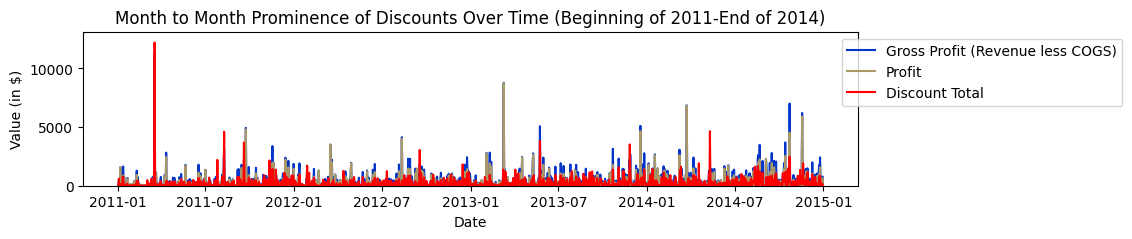

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,2))
ax.plot(df_y_m_agg.index, df_y_m_agg['gross_profit'], color = '#0335CA', label = 'Gross Profit (Revenue less COGS)')
ax.plot(df_y_m_agg.index, df_y_m_agg['gross_profit_less_discounts'], color = '#AA9868', label = 'Profit')
ax.plot(df_y_m_agg.index, df_y_m_agg['discount_total'], color = 'red', label = 'Discount Total')
ax.set(title = 'Month to Month Prominence of Discounts Over Time (Beginning of 2011-End of 2014)', xlabel = 'Date', ylabel = 'Value (in $)', ylim = (0,None))

ax.legend(loc = 'upper right', bbox_to_anchor = (1.35,1))

In [ ]:
df_y_m_agg

,gross_profit,discount_total,gross_profit_less_discounts
order_date,,,
2011-01-02,47.019500,43.599900,3.4196
2011-01-03,393.189100,602.150500,-208.9614
2011-01-04,29.507200,3.417600,26.0896
2011-01-05,0.000000,0.000000,0.0000
2011-01-06,1583.302900,6.552000,1576.7509
...,...,...,...
2014-12-27,66.519000,5.398800,61.1202
2014-12-28,36.430600,68.404800,-31.9742
2014-12-29,414.279696,161.160896,253.1188


***2014 Analysis By day***

In [ ]:
pd.DataFrame(df_2014.resample('D')['gross_profit_less_discounts'].sum())

,gross_profit_less_discounts
order_date,
2014-01-01,68.2435
2014-01-02,0.0000
2014-01-03,8.2242
2014-01-04,1802.2158
2014-01-05,-68.1250
...,...
2014-12-27,61.1202
2014-12-28,-31.9742
2014-12-29,253.1188


In [ ]:
pd.DataFrame(df_2014.resample('D').agg({'gross_profit':'sum','discount_total':'sum'}))

,gross_profit,discount_total
order_date,,
2014-01-01,213.869100,145.625600
2014-01-02,0.000000,0.000000
2014-01-03,8.224200,0.000000
2014-01-04,1905.592696,103.376896
2014-01-05,313.212400,381.337400
...,...,...
2014-12-27,66.519000,5.398800
2014-12-28,36.430600,68.404800
2014-12-29,414.279696,161.160896


In [ ]:
#considering a merge to plot all three in matplotlib on one graph

net_sales_14 = pd.DataFrame(df_2014.resample('D')['gross_profit_less_discounts'].sum())

gross_vs_disc_14 = pd.DataFrame(df_2014.resample('D').agg({'gross_profit':'sum','discount_total':'sum'}))

agg_14 = pd.merge(gross_vs_disc_14, net_sales_14, how = 'left', left_index = True, right_index = True)


In [ ]:
#2014 Net Sales
agg_14['gross_profit_less_discounts'].sum()

93507.51310000001

In [ ]:
#2014 Net Sales With Discounts Eliminated
agg_14['gross_profit'].sum()

194905.725434

In [ ]:
#hypothetical sales if discounts were not applied on 2014 sales
agg_14_copy = agg_14
agg_14_copy['potential_net'] = agg_14_copy['discount_total'] + agg_14_copy['gross_profit_less_discounts']

agg_14_copy = agg_14_copy.reset_index()

filename = 'agg_sales_14.xlsx'
agg_14_copy.to_excel(r"/media"+filename, index = False)

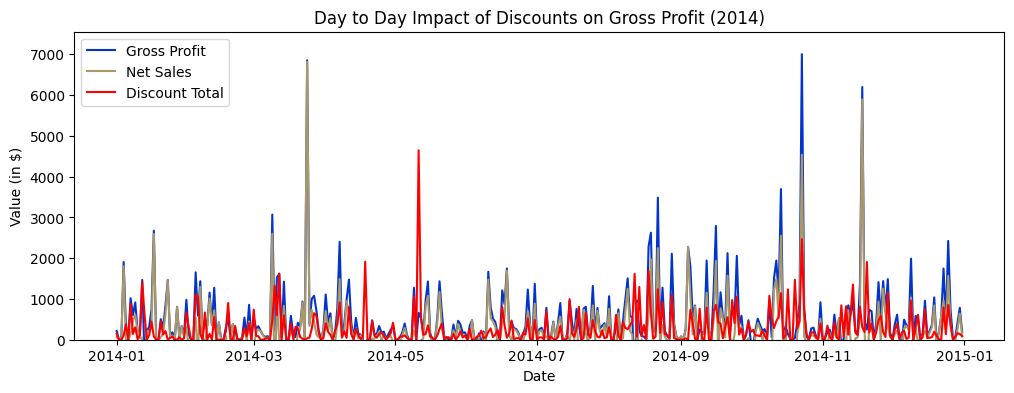

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,4))
ax.plot(agg_14.index, agg_14['gross_profit'], color = '#0335CA', label = 'Gross Profit')
ax.plot(agg_14.index, agg_14['gross_profit_less_discounts'], color = '#AA9868', label = 'Net Sales')
ax.plot(agg_14.index, agg_14['discount_total'], color = 'red', label = 'Discount Total')
ax.set(title = 'Day to Day Impact of Discounts on Gross Profit (2014)', xlabel = 'Date', ylabel = 'Value (in $)', ylim = (0,None))

ax.legend()

In [ ]:
#most orders by weekday 2014 #can simply use when explaining the cumlative weekly sales chart

most_orders_14 = df_2014.groupby('day_ordered')[['quantity_ordered','gross_profit_less_discounts']].sum().sort_values(by = 'quantity_ordered', ascending = False)